# WiDS Datathon 2024 Challenge #2 - Predict Time Duration to receive metastatic cancer diagnosis.

**Objective:**
The aim of this challenge is to predict the duration of time it takes for patients to receive a metastatic cancer diagnosis. 
* The primary focus is to identify relationships between patient demographics and the likelihood of receiving timely treatment. 
* Additionally, the challenge seeks to explore the potential impact of climate patterns on proper diagnosis and treatment.

**Summary:**

Metastatic triple-negative breast cancer (TNBC) is one of the most aggressive forms of breast cancer and requires immediate, timely treatment. Delays in diagnosis and subsequent treatment can lead to severe consequences for patients. Variations in the wait time for treatment can indicate disparities in healthcare access.

In the first datathon challenge, participants investigated how socio-economic factors contribute to health equity. Building on that analysis, this challenge will examine the role of climate patterns in influencing access to healthcare. Addressing healthcare inequity is a global issue, and improving women's health can lead to significant positive impacts on societies and economies. This datathon is designed to help uncover whether disparate treatments exist and to understand the drivers of those biases, including demographic and societal factors.

**Data:**

Gilead Sciences, Inc., a leading biopharmaceutical company, is sponsoring this year's WiDS Datathon. The company is known for its research, development, and commercialization of medicines in virology, infectious diseases, oncology, and other areas of unmet medical need. Gilead Sciences is committed to creating a healthier world through bold and transformative science.

For the challenge, Gilead Sciences provided a comprehensive, real-world dataset containing information about patient demographics, diagnosis, treatment options, and insurance details for patients diagnosed with breast cancer. The data originated from Health Verity, one of the largest healthcare data ecosystems in the US. It was enhanced with third-party geo-demographic data to offer insights into socio-economic factors affecting health equity. Additionally, the dataset was further enriched with zip code-level climate data for this challenge.


**Process Workflow:**

These high-level steps outline the approach taken in the notebook to predict the outcome of the time duration it takes for patients to receive a metastatic cancer diagnosis:

1. **Data Loading and Exploration:**
   - Load the provided dataset and required libraries into the notebook.
   - Perform an initial exploration of the data to understand its structure, format, and key features.


2. **Data Preprocessing:**
   - Clean the data by handling missing values, outliers, and inconsistencies.
   - Conduct Exploratory Data Analysis (EDA) to analyze patterns, distributions, correlations, and outliers.
   - Standardize and normalize data where necessary.


3. **Feature Engineering:**
   - Perform encoding of categorical features using techniques such as one-hot encoding or label encoding.
   - Identify and create new features that may improve model performance, such as combining or transforming existing features.
   - Utilize domain knowledge to derive meaningful features related to patient demographics, treatment, and climate data.


4. **Model Training:**
   - Split the dataset into training, validation and testing sets.
   - Select appropriate machine learning models for the prediction task (e.g., regression, decision trees, random forests, gradient boosting, or neural networks).
   - Train the selected models on the training set using relevant hyperparameters.


5. **Model Evaluation:**
   - Evaluate model performance on the validation set and the testing set using relevant metrics (e.g., mean absolute error, root mean squared error, or R-squared).
   - Compare the performance of different models to select the best-performing one.


6. **Model Tuning and Optimization:**
   - Tune the chosen model by adjusting hyperparameters to improve its performance.
   - Train the model again with the tuned and optimized parameters and implement ensemble methods.


7. **Conclusion and Recommendations:**
    - Summarize the findings and insights from the analysis.
    - Provide recommendations / future considerations based on the results to address disparities in healthcare access and improve patient outcomes.


## 1. Data Loading and Exploration 

This step focuses on:
* Importing required libraries
* Importing and loading the dataset
* Data Overview

### 1.1. Importing libraries

In [1]:
#Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for EDA
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

# for Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


#for feature engineering
from sklearn.preprocessing import KBinsDiscretizer, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.feature_selection import SelectKBest, mutual_info_regression

#define RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

### 1.2. Importing Dataset

In [2]:
#Import Dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

raw_data_train = pd.read_csv('/kaggle/input/widsdatathon2024-challenge2/train.csv')
raw_data_test = pd.read_csv('/kaggle/input/widsdatathon2024-challenge2/test.csv')

/kaggle/input/widsdatathon2024-challenge2/solution_template.csv
/kaggle/input/widsdatathon2024-challenge2/train.csv
/kaggle/input/widsdatathon2024-challenge2/test.csv


### 1.3. Data Overview:

Use raw_data_train.info() and raw_data_test.info() to get an overview of the data structure in the training and test datasets, including the number of rows and columns, and the data types of each column.

In [3]:
# Train Data Overview
print('Training Dataset Overview: \n', raw_data_train.info(), '\n')
print('Testing Dataset Overview: \n', raw_data_test.info(), '\n')

# Test Data Overview
print('Train Dataset \n',raw_data_train.head(), '\n')
print('Test Dataset \n',raw_data_test.head(), '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB
Training Dataset Overview: 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Columns: 151 entries, patient_id to Average of Dec-18
dtypes: float64(137), int64(3), object(11)
memory usage: 6.5+ MB
Testing Dataset Overview: 
 None 

Train Dataset 
    patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age pati

**Data Overview:**
- **Training Dataset:**
  - The training dataset contains 13,173 entries (rows) and 152 columns (features).
  - The data types include float64, int64, and object, indicating a mix of numerical and categorical data.

- **Test Dataset:**
  - The test dataset contains 5,646 entries (rows) and 151 columns (features).
  - The data types are similar to the training dataset, with a mix of float64, int64, and object types.

### 1.4. Summary Statistics:

Summary statistics provide information about the central tendency and dispersion of the data, including mean, median, standard deviation, and range for numerical features using raw_data_train.describe() and raw_data_test.describe().

In [4]:
# summary statistics for the train dataset
raw_data_train.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,...,13173.000000,13173.000000,13164.000000,13127.000000,13157.000000,13166.000000,13166.000000,13161.000000,13140.000000,13173.000000
mean,555441.784939,568.530859,59.271313,29.168808,20651.373928,1776.872376,40.542676,11.104988,12.857587,13.297375,...,52.411982,67.932236,73.074635,77.120929,76.281156,71.417027,59.323286,46.100150,42.096213,96.515221
std,259476.503094,275.758485,13.218883,5.752820,13840.379638,3876.061897,4.031027,1.511534,1.952248,3.390472,...,11.069900,6.301740,6.581630,5.335091,5.282156,6.502875,9.261934,12.245594,11.209011,108.969873
min,100043.000000,100.000000,18.000000,15.000000,635.550000,0.920000,20.600000,0.000000,6.310000,5.930000,...,28.790000,45.880000,53.460000,58.540000,56.200000,51.830000,37.540000,19.150000,15.380000,0.000000
25%,335100.000000,330.000000,50.000000,24.825000,9160.340000,163.150000,37.190000,10.150000,11.650000,11.000000,...,42.900000,63.220000,68.050000,73.170000,72.550000,67.020000,51.970000,35.560000,33.370000,3.000000
50%,555769.000000,557.000000,59.000000,28.580000,18952.780000,700.340000,40.640000,11.000000,12.900000,12.530000,...,50.290000,66.120000,71.640000,76.650000,76.080000,70.880000,57.450000,42.430000,38.500000,44.000000
75%,780967.000000,832.000000,67.000000,33.000000,30021.280000,1666.520000,42.940000,12.140000,13.910000,14.970000,...,62.220000,72.590000,77.660000,80.290000,79.130000,75.640000,67.360000,55.730000,50.500000,181.000000
max,999982.000000,995.000000,91.000000,97.000000,71374.130000,29851.690000,54.570000,17.680000,35.300000,62.100000,...,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,73.540000,365.000000


In [5]:
# summary statistics for the test dataset
raw_data_test.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
count,5646.000000,5646.000000,5646.000000,1705.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,5646.000000,...,5639.000000,5646.000000,5646.000000,5641.000000,5630.000000,5639.000000,5644.000000,5644.000000,5638.000000,5623.000000
mean,549581.847680,569.824655,58.921537,29.142798,20865.277040,1826.421314,40.509499,11.123819,12.868130,13.291959,...,46.471807,52.753471,68.065220,73.188927,77.221172,76.388918,71.584807,59.669313,46.499769,42.477839
std,260549.557126,276.824893,13.326813,5.612167,14252.666477,3928.358993,3.983375,1.498752,1.906942,3.226722,...,12.057043,11.079245,6.304141,6.539446,5.279963,5.239295,6.481236,9.311322,12.323264,11.295638
min,100401.000000,100.000000,18.000000,16.000000,829.520000,0.920000,30.030000,5.220000,6.310000,5.930000,...,14.910000,25.670000,40.580000,49.620000,57.440000,50.300000,43.780000,32.020000,14.160000,4.330000
25%,325189.750000,330.000000,50.000000,24.840000,8893.480000,161.930000,37.130000,10.150000,11.680000,11.020000,...,36.440000,43.590000,63.260000,68.160000,73.272500,72.550000,67.030000,52.110000,35.635000,33.430000
50%,551142.500000,554.000000,59.000000,28.340000,19154.190000,688.010000,40.640000,11.040000,12.920000,12.540000,...,43.650000,51.200000,66.120000,71.750000,76.685000,76.330000,70.900000,58.200000,43.210000,39.560000
75%,773004.000000,836.000000,66.000000,33.140000,30145.890000,1686.320000,42.940000,12.190000,13.890000,14.970000,...,58.990000,62.340000,72.690000,77.920000,80.660000,79.580000,76.070000,67.880000,55.930000,51.040000
max,999846.000000,997.000000,91.000000,43.700000,71374.130000,29851.690000,54.570000,17.680000,24.900000,36.900000,...,71.640000,76.490000,86.570000,90.660000,96.430000,95.770000,89.190000,81.460000,76.300000,73.540000


**Statistical Summary of Train and Test Datasets:**
  - Both datasets contain a range of ages, with the mean age around 59 years.
  - The datasets contain varying body mass index (BMI) values, with a mean around 29.
  - The target variable in the training dataset (metastatic_diagnosis_period) ranges from 0 to 365 days. This column represents the duration of time it takes for patients to receive a metastatic cancer diagnosis.
  
  
**Considerations for Data Analysis and Modeling:**
- **Handling Missing Values:** The datasets have different counts for some columns, indicating potential missing values that need to be addressed.
- **Feature Engineering:**  Transforming some variables to extract more insights or creating new features based on the existing data.
- **Normalization:** Need to normalize or standardize numerical features.

### 1.5. Check Missing Values:

To identify columns with missing values and the proportion of missing data in each column, we will use raw_data_train.isnull().sum() and raw_data_test.isnull().sum().

In [6]:
# Calculate the sum of missing values for each column in the training dataset
train_missing_values = raw_data_train.isnull().sum()

# Calculate the sum of missing values for each column in the test dataset
test_missing_values = raw_data_test.isnull().sum()

# Sort the missing values in descending order and display the top columns
print('Top Columns with Missing Values in Train Dataset (in descending order):\n')
print(train_missing_values.sort_values(ascending=False).head(30))

print('\nTop Columns with Missing Values in Test Dataset (in descending order):\n')
print(test_missing_values.sort_values(ascending=False).head(30))

Top Columns with Missing Values in Train Dataset (in descending order):

metastatic_first_novel_treatment_type    13162
metastatic_first_novel_treatment         13162
bmi                                       9071
patient_race                              6657
payer_type                                1765
Average of Apr-14                          180
Average of Jun-14                          152
Average of Oct-13                           59
Average of Jul-18                           46
Average of Dec-18                           33
Average of Jan-13                           33
Average of Jul-17                           31
Average of Mar-14                           29
Average of Apr-15                           28
Average of Sep-13                           27
Average of Nov-14                           24
Average of Aug-15                           22
Average of Oct-17                           21
Average of Jun-13                           20
Average of May-16                 

In [7]:
# Display Columns that contains high missing values in the Training Dataset

# Create a bar plot using plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=train_missing_values.sort_values(ascending=False).head(10).index,  # Columns
    y=train_missing_values.sort_values(ascending=False).head(10),  # Missing Values
    marker_color='#A301BF'
))

fig.update_layout(
#     title='Columns With High Missing Values',
    xaxis=dict(title='Columns', tickangle=45),
    yaxis=dict(title='Missing Values'),
    hovermode='closest',  # Show closest data point on hover
    annotations=[
        dict(
            x=0.5,
            y=1.15,
            xref='paper',
            yref='paper',
            text='Columns With High Missing Values',
            showarrow=False,
            font=dict(size=16),
            align='center'
        )
    ]
)

fig.show()


**Summary - Missing Values in the Dataset**

There are several columns in both the training and test datasets with a high proportion of missing values. The columns with the most missing values are:

- **metastatic_first_novel_treatment_type**: This column has 13,162 missing values in the training dataset and 5,639 missing values in the test dataset.
- **metastatic_first_novel_treatment**: This column also has 13,162 missing values in the training dataset and 5,639 missing values in the test dataset.
- **bmi**: This column has 9,071 missing values in the training dataset and 3,941 missing values in the test dataset.
- **patient_race**: This column has 6,657 missing values in the training dataset and 2,785 missing values in the test dataset.
- **payer_type**: This column has 1,765 missing values in the training dataset and 785 missing values in the test dataset.
- **Remaining Columns**: There are several other columns with very low number of missing values such as 'Average of Apr-14, 'Average of Jun-14', 'Average of Oct-13' and more.


**To handle missing values:**

1. **Remove columns with high missing values**: If a column has a very high proportion of missing values (e.g., metastatic_first_novel_treatment_type and metastatic_first_novel_treatment), we can remove the column entirely from the dataset, as filling in such a high proportion of missing values might lead to inaccurate results.

2. **Fill missing values with a specific strategy**: For columns with fewer missing values (e.g., bmi, Average of Apr-14, 'Average of Jun-14', 'Average of Oct-13', and others), we can fill in missing values using a specific strategy, such as:
    - Filling missing values with the mean, median, or mode of the column.
    - Using forward or backward fill methods.


4. **Use advanced techniques**: Techniques such as imputation methods can be used to estimate and fill in missing values for columns like patient_race, and payer_type as they have signigficant missing values and these values might influence the target variable. 

### 1.6. Identify Categorical Features:

To determine which columns contain categorical data, we can examine the data types and unique values in each column, using raw_data_train.nunique() and raw_data_test.nunique() to get the number of unique values in each column.


In [8]:
print('Train Dataset\n',raw_data_train.nunique(), '\n')
print('Test Dataset\n',raw_data_test.nunique(), '\n')


Train Dataset
 patient_id                     13173
patient_race                       5
payer_type                         3
patient_state                     44
patient_zip3                     751
                               ...  
Average of Sep-18                639
Average of Oct-18                664
Average of Nov-18                661
Average of Dec-18                663
metastatic_diagnosis_period      366
Length: 152, dtype: int64 

Test Dataset
 patient_id           5646
patient_race            5
payer_type              3
patient_state          44
patient_zip3          669
                     ... 
Average of Aug-18     551
Average of Sep-18     570
Average of Oct-18     598
Average of Nov-18     597
Average of Dec-18     599
Length: 151, dtype: int64 



**Summary of Unique Values in Training and Test Datasets:**

The output shows the number of unique values for each column in the training and test datasets. Understanding the uniqueness of each column helps in making decisions about feature engineering, including one-hot encoding , and potential issues with overfitting in the models.

  - patient_id: All entries are unique, as expected.
  - patient_race: There are 5 unique races.
  - payer_type: There are 3 unique types of payers.
  - patient_state: Patients come from 44 different states.
  - patient_zip3: There are 751 unique ZIP codes in the train dataset where as 669 in test.
  - Each month's climate data has several hundred unique values (e.g., Average of Sep-18 has 639 unique values).
  - metastatic_diagnosis_period: There are 366 unique values, indicating a broad range of diagnosis periods.

## 2. Data Preprocessing - Data Cleaning and Preparation

This step focuses on:

- **Drop columns with hight missing values**: Columns such as metastatic_first_novel_treatment and metastatic_first_novel_treatment_type which have significant missing values would be dropped.
- **Validate and Clean Data**: Verify the correctness of data features and address any inconsistencies or errors through validation and cleaning processes.
- **Handling Missing Values**: Depending on the nature of the missing data, different techniques such as imputation, or interpolation may be used to handle missing values.
- **EDA**: Conduct Exploratory Data Analysis (EDA) to analyze patterns, distributions, correlations, and outliers.
- **Treat Outliers**: The Exploratory Data Analysis (EDA) identifies features with outliers that could impact the results. Using the Interquartile Range (IQR) method to treat these outliers helps to minimize their influence. The IQR method effectively removes extreme values by focusing on the middle 50% of the data, which helps to ensure more robust statistical analysis.





### 2.1 Drop Columns with high missing values

As observed in the overview step, the columns metastatic_first_novel_treatment (the column contains Generic drug name of the first novel treatment (e.g. "Cisplatin") after metastatic diagnosis) and metastatic_first_novel_treatment_type (the column contains Description of Treatment (e.g. Antineoplastic) of first novel treatment after metastatic diagnosis) contain a large number of missing values (5639). Filling these missing values could lead to inaccurate results and hence we will drop them from train as well as test dataset.

In [9]:
# Drop the columns with high missing values from the training dataset
train_dataset = raw_data_train.drop(['metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment'], axis=1)

# Drop the columns with high missing values from the test dataset
test_dataset = raw_data_test.drop(['metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment'], axis=1)

# Check the shape of the training and test datasets
print("Training dataset shape:", train_dataset.shape) #150
print("Test dataset shape:", test_dataset.shape) #149


Training dataset shape: (13173, 150)
Test dataset shape: (5646, 149)


### 2.2 Validate and Clean data

This crucial step entails validating the correctness of the dataset's features. Any inconsistencies or errors found are addressed through appropriate cleaning procedures. Ensuring data accuracy is essential before proceeding to handle missing values, as these features will play a significant role in subsequent imputation tasks.

Check for Data Correctness in the following features:

* **Patient_zip3 and patinet_state**: 
   - Verify the correctness of all zip3 values. Every zip3 value is associated with only one state. Hence if any state - zip3 combination has more than one associated, it should be corrected.
   - As observed below, the zip3 630 is associated with states MO and IL. But upon manual inspeaction from the USPS government data, it was found that 630 zip3 is assocated with MO state and hence this should be corrected.
   - Similarly, 864 zip3 is linked with AZ and CA but the correction combination is AZ - 864.


In [10]:
#patient_state - fetch incorrect state and zip3 combinations
incorrect_combination_train = train_dataset[['patient_state','patient_zip3']].drop_duplicates().groupby(['patient_zip3'], as_index=False)['patient_state']. \
    count().sort_values('patient_state', ascending=False).reset_index(drop=True).head()
print ('state and zip3 combinations - Train Dataset: \n',incorrect_combination_train)

#patient_state - fetch incorrect state and zip3 combinations - test dataset
incorrect_combination_test = test_dataset[['patient_state','patient_zip3']].drop_duplicates().groupby(['patient_zip3'], as_index=False)['patient_state']. \
    count().sort_values('patient_state', ascending=False).reset_index(drop=True).head()
print ('\nstate and zip3 combinations - Test Dataset: \n',incorrect_combination_test)

#Correct the discrepanices - edit the state for the zip3
# Update patient_state for specific patient_zip3 values
train_dataset.loc[train_dataset['patient_zip3'] == 630, 'patient_state'] = 'MO'
train_dataset.loc[train_dataset['patient_zip3'] == 864, 'patient_state'] = 'AZ'

# Update patient_state for specific patient_zip3 values - test_dataset
test_dataset.loc[test_dataset['patient_zip3'] == 630, 'patient_state'] = 'MO'
test_dataset.loc[test_dataset['patient_zip3'] == 864, 'patient_state'] = 'AZ'

#Verify the changes
train_dataset.loc[train_dataset.patient_zip3.isin([630, 864]), ['patient_state','patient_zip3']].drop_duplicates()

state and zip3 combinations - Train Dataset: 
    patient_zip3  patient_state
0           630              2
1           864              2
2           100              1
3           678              1
4           668              1

state and zip3 combinations - Test Dataset: 
    patient_zip3  patient_state
0           100              1
1           667              1
2           672              1
3           674              1
4           675              1


,patient_state,patient_zip3
475,MO,630
5299,AZ,864


*  **Region**
    - To correct the features, a dictionary is created to help verify the Region and Divison columns.
    - Extract unique combinations of patient_state and Region from the dataset
    - Inspect if all states are assigned to the correct region
    - Any discrepancy found is corrected by changing the region column value with the associated state.


In [11]:
#Create a Region, Division and State dictionary to help verify the Region and Division columns

# Define the region-state-division mapping
region_state_division_mapping = {
    ('Midwest', 'IN'): 'East North Central',
    ('Midwest', 'IL'): 'East North Central',
    ('Midwest', 'MI'): 'East North Central',
    ('Midwest', 'OH'): 'East North Central',
    ('Midwest', 'WI'): 'East North Central',
    ('Midwest', 'NE'): 'West North Central',
    ('Midwest', 'IA'): 'West North Central',
    ('Midwest', 'KS'): 'West North Central',
    ('Midwest', 'ND'): 'West North Central',
    ('Midwest', 'MN'): 'West North Central',
    ('Midwest', 'MO'): 'West North Central',
    ('Midwest', 'SD'): 'West North Central',
    ('South', 'DE'): 'South Atlantic',
    ('South', 'DC'): 'South Atlantic',
    ('South', 'FL'): 'South Atlantic',
    ('South', 'GA'): 'South Atlantic',
    ('South', 'MD'): 'South Atlantic',
    ('South', 'NC'): 'South Atlantic',
    ('South', 'SC'): 'South Atlantic',
    ('South', 'VA'): 'South Atlantic',
    ('South', 'WV'): 'South Atlantic',
    ('West', 'AZ'): 'Mountain',
    ('West', 'CO'): 'Mountain',
    ('West', 'ID'): 'Mountain',
    ('West', 'NM'): 'Mountain',
    ('West', 'MT'): 'Mountain',
    ('West', 'UT'): 'Mountain',
    ('West', 'NV'): 'Mountain',
    ('West', 'WY'): 'Mountain',
    ('West', 'AK'): 'Pacific',
    ('West', 'CA'): 'Pacific',
    ('West', 'HI'): 'Pacific',
    ('West', 'OR'): 'Pacific',
    ('West', 'WA'): 'Pacific',
    ('Northeast', 'ME'): 'New England',
    ('Northeast', 'MA'): 'New England',
    ('Northeast', 'NH'): 'New England',
    ('Northeast', 'RI'): 'New England',
    ('Northeast', 'VT'): 'New England',
    ('Northeast', 'CT'): 'New England',
    ('Northeast', 'NJ'): 'Middle Atlantic',
    ('Northeast', 'NY'): 'Middle Atlantic',
    ('Northeast', 'PA'): 'Middle Atlantic',
    ('South', 'AL'): 'East South Central',
    ('South', 'KY'): 'East South Central',
    ('South', 'MS'): 'East South Central',
    ('South', 'TN'): 'East South Central',
    ('South', 'AR'): 'West South Central',
    ('South', 'LA'): 'West South Central',
    ('South', 'OK'): 'West South Central',
    ('South', 'TX'): 'West South Central'
}

In [12]:
# Validate and Correct Region Column Values

# Step 1: Extract unique state-region combinations
unique_state_region_combinations = train_dataset[['patient_state', 'Region']].drop_duplicates()
unique_state_region_combinations_test = test_dataset[['patient_state', 'Region']].drop_duplicates()

# Group by Region and concatenate states
grouped_states = unique_state_region_combinations.groupby('Region')['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
grouped_states_test = unique_state_region_combinations_test.groupby('Region')['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Print the regions along with their associated states - train Dataset
print('Unique State and Region Combination in the Train Dataset:')
print(grouped_states.to_string(index=False))
        
# Print the regions along with their associated states - test Dataset
print('\nUnique State and Region Combination in the Test Dataset:')
print(grouped_states_test.to_string(index=False))

# Print total count of rows
print("\nTotal rows for Train Dataset:", len(unique_state_region_combinations)) #44
print("Total rows for Test Dataset:", len(unique_state_region_combinations_test)) #44

# # Step 2: Check for Discrepancies and print them - Train Dataset
# discrepancies = []
# for index, row in unique_state_region_combinations.iterrows():
#     state = row['patient_state']
#     region = row['Region']
    
#     if (region, state) not in region_state_division_mapping:
#         discrepancies.append((region, state))
        
# print ('\ndiscrepancies in Train Dataset: \n', discrepancies)
       
# # Check for Discrepancies and print them - Test Dataset
# discrepancies_test = []
# for index, row in unique_state_region_combinations_test.iterrows():
#     state = row['patient_state']
#     region = row['Region']
    
#     if (region, state) not in region_state_division_mapping:
#         discrepancies_test.append((region, state))
        
# print ('\ndiscrepancies in Test Dataset: \n', discrepancies_test)

# # Step 3: Correction - Iterate over discrepancies and update train dataset
# print('\nCorrections for the Train Dataset:')
# for region, state in discrepancies:
#     correct_region = None
#     for reg, st in region_state_division_mapping:
#         if st == state:
#             correct_region = reg
#             break
#     if correct_region:
#         print(f"For the state {state}, the correct region is {correct_region}")
#         train_dataset.loc[(train_dataset['patient_state'] == state) & (train_dataset['Region'] == region), 'Region'] = correct_region
    
# # Correction - Iterate over discrepancies and update test dataset
# print('\nFor Test Dataset')
# for region, state in discrepancies_test:
#     correct_region_test = None
#     for reg, st in region_state_division_mapping:
#         if st == state:
#             correct_region_test = reg
#             break
#     if correct_region_test:
#         print(f"For the state {state}, the correct region is {correct_region_test}")
#         test_dataset.loc[(test_dataset['patient_state'] == state) & (test_dataset['Region'] == region), 'Region'] = correct_region_test

# # Step 4: Verify the changes implemented in the state-region combination in the train and test dataset

# # Extract unique combinations of patient_state and Region from train_dataset and test_dataset
# unique_state_region_combinations_train = train_dataset[['patient_state', 'Region']].drop_duplicates()
# unique_state_region_combinations_test = test_dataset[['patient_state', 'Region']].drop_duplicates()

# # Group by Region and concatenate states for train_dataset and 
# grouped_states_train = unique_state_region_combinations_train.groupby('Region')['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
# grouped_states_test = unique_state_region_combinations_test.groupby('Region')['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# # Print the regions along with their associated states for train_dataset
# print("\nUnique State-Region Combinations in Train Dataset after correction:")
# print(grouped_states_train.to_string(index=False))

# # Print the regions along with their associated states for test_dataset
# print("\nUnique State-Region Combinations in Test Dataset after correction:")
# print(grouped_states_test.to_string(index=False))

# # Print total count of rows for train_dataset and test_dataset
# print("\nTotal rows in Train Dataset after correction:", len(unique_state_region_combinations_train)) #44
# print("Total rows in Test Dataset after correction:", len(unique_state_region_combinations_test)) #44



Unique State and Region Combination in the Train Dataset:
   Region                                                      patient_state
  Midwest                     IA, IL, IN, KS, MI, MN, MO, ND, NE, OH, SD, WI
Northeast                                                             NY, PA
    South AL, AR, DC, DE, FL, GA, KY, LA, MD, MS, NC, OK, SC, TN, TX, VA, WV
     West                 AK, AZ, CA, CO, HI, ID, MT, NM, NV, OR, UT, WA, WY

Unique State and Region Combination in the Test Dataset:
   Region                                                      patient_state
  Midwest                     IA, IL, IN, KS, MI, MN, MO, ND, NE, OH, SD, WI
Northeast                                                             NY, PA
    South AL, AR, DC, DE, FL, GA, KY, LA, MD, MS, NC, OK, SC, TN, TX, VA, WV
     West                 AK, AZ, CA, CO, HI, ID, MT, NM, NV, OR, UT, WA, WY

Total rows for Train Dataset: 44
Total rows for Test Dataset: 44


Since no discrepancy is found in the State and Region Assocaition, we can move to the next feature.

*  **Division**
    - Extract the values based on Region, Divison and States and inspect the result.
    - Correct any discrepanices found

In [13]:
# Check and verify Division Column

# Group the data by Region and Division, and aggregate unique patient_state values
unique_combinations = train_dataset.groupby(['Region', 'Division'])['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
unique_combinations_test = test_dataset.groupby(['Region', 'Division'])['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Print the unique combinations
print('\nunique_combinations of Region, State and Divsion in Train Dataset before correction: \n',unique_combinations)
# print('\nunique_combinations of Region, State and Divsion in Test Dataset before correction: \n',unique_combinations_test)


# Fetch unique combinations of Region, Division, and State from train and test datasets
unique_combinations_train = train_dataset[['Region', 'Division', 'patient_state']].drop_duplicates()
unique_combinations_test = test_dataset[['Region', 'Division', 'patient_state']].drop_duplicates()

incorrect_mappings_train = []
# Identify incorrect mappings and update Division using region_state_division_mapping
for index, row in unique_combinations_train.iterrows():
    region = row['Region']
    division = row['Division']
    state = row['patient_state']
    
    if (region, state) in region_state_division_mapping:
        correct_division = region_state_division_mapping[(region, state)]
        if division != correct_division:
            incorrect_mappings_train.append((region, division, state, correct_division))
        
        # Update Division column in train_dataset
        train_dataset.loc[(train_dataset['Region'] == region) & (train_dataset['Division'] == division) & (train_dataset['patient_state'] == state), 'Division'] = correct_division

# Print incorrect mappings in train dataset
print("\nIncorrect Mappings in Train Dataset:")
for region, division, state, correct_division in incorrect_mappings_train:
    print(f"For the state {state}, the current division in region {region} is {division}, but it should be {correct_division}.")

incorrect_mappings_test = []
# Similarly, update Division column in test dataset
for index, row in unique_combinations_test.iterrows():
    region = row['Region']
    division = row['Division']
    state = row['patient_state']
    
    if (region, state) in region_state_division_mapping:
        correct_division = region_state_division_mapping[(region, state)]
        if division != correct_division:
            incorrect_mappings_test.append((region, division, state, correct_division))
    
        # Update Division column in test_dataset
        test_dataset.loc[(test_dataset['Region'] == region) & (test_dataset['Division'] == division) & (test_dataset['patient_state'] == state), 'Division'] = correct_division

# Print incorrect mappings in test dataset
# print("\nIncorrect Mappings in Test Dataset:")
# for region, division, state, correct_division in incorrect_mappings_test:
#     print(f"For the state {state}, the current division in region {region} is {division}, but it should be {correct_division}.")
    
#Validate the corrected changes
# Group the data by Region and Division, and aggregate unique patient_state values
unique_combinations = train_dataset.groupby(['Region', 'Division'])['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()
unique_combinations_test = test_dataset.groupby(['Region', 'Division'])['patient_state'].apply(lambda x: ', '.join(sorted(set(x)))).reset_index()

# Print the unique combinations
print('\nunique_combinations of Region, State and Divsion in Train Dataset after correction: \n',unique_combinations)
# print('\nunique_combinations of Region, State and Divsion in Test Dataset after correction: \n',unique_combinations_test)



unique_combinations of Region, State and Divsion in Train Dataset before correction: 
       Region            Division                       patient_state
0    Midwest  East North Central              IL, IN, MI, MO, OH, WI
1    Midwest  West North Central          IA, KS, MN, MO, ND, NE, SD
2  Northeast     Middle Atlantic                              NY, PA
3      South  East South Central                      AL, KY, MS, TN
4      South      South Atlantic  DC, DE, FL, GA, MD, NC, SC, VA, WV
5      South  West South Central                      AR, LA, OK, TX
6       West            Mountain      AZ, CO, ID, MT, NM, NV, UT, WY
7       West             Pacific                  AK, CA, HI, OR, WA

Incorrect Mappings in Train Dataset:
For the state MO, the current division in region Midwest is East North Central, but it should be West North Central.

unique_combinations of Region, State and Divsion in Train Dataset after correction: 
       Region            Division                 

**Check for inconsistencies in the features that are associated with the zip3 column**: 

   - For each unique zip3 value in dataset, certain features should ideally hold similar values. For example, the density, population, income household median, and other pertinent features should exhibit consistency across zip codes. Any discrepancy should be corrected.
 - Identify zip codes (patient_zip3) with multiple sets of different values across columns.
 - For each identified zip code, identify the rows with different values.
 - Update the values of the rows with different values to match the majority of the values for that zip code.

In [14]:
# Function to identify and update incorrect rows within each zip3 group
def update_incorrect_rows(df, selected_cols):
    # Group the data by 'patient_zip3'
    grouped_data = df.groupby('patient_zip3')

    # Iterate over each group
    for name, group in grouped_data:
        # Compute the mode values for the selected columns within the group
        majority_values = group[selected_cols].mode().iloc[0]
        
        # Identify the row(s) with different values compared to the majority
        diff_rows = group[(group[selected_cols] != majority_values).any(axis=1)]
        
        # If there are any different rows, update them with the majority values
        if not diff_rows.empty:
            print(f"\nZip code {name} has different values in columns")
            print(train_dataset[train_dataset['patient_zip3'] == name][['patient_zip3', 'population', 'density', 'age_median', 'married']])
            df.loc[diff_rows.index, selected_cols] = majority_values.values
            print("Updated values:\n")
            print(train_dataset[train_dataset['patient_zip3'] == name][['patient_zip3', 'population', 'density', 'age_median', 'married']])

    return df

# Specify the columns to be checked and updated
selected_cols = ['population', 'density', 'age_median', 'married', 'family_size', 'income_household_median', 'income_household_six_figure', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'education_college_or_above', 'labor_force_participation', 'unemployment_rate', 'divorced', 'never_married', 'widowed', 'family_dual_income', 'income_individual_median', 'poverty', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_stem_degree', 'self_employed', 'farmer', 'disabled', 'limited_english', 'commute_time', 'health_uninsured', 'veteran']

# Call the function to update incorrect rows within each zip3 group for train_dataset
print("\nInCorrected Rows for train_dataset:")
updated_train_df = update_incorrect_rows(train_dataset, selected_cols)

# Call the function to update incorrect rows within each zip3 group for test_dataset
print("\nInCorrected Rows for test_dataset:")
updated_test_df = update_incorrect_rows(test_dataset, selected_cols)

# Validate the implementation
# Filter the DataFrame to display only the corrected rows based on the condition of different values for train_dataset
corrected_train_rows = updated_train_df[(updated_train_df[selected_cols] != updated_train_df[selected_cols].mode().iloc[0]).any(axis=1)]
# print("\nCorrected Rows for train_dataset:")
# print(corrected_train_rows[['patient_id', 'patient_zip3', 'population', 'density', 'age_median', 'married', 'family_size']])

# Filter the DataFrame to display only the corrected rows based on the condition of different values for test_dataset
corrected_test_rows = updated_test_df[(updated_test_df[selected_cols] != updated_test_df[selected_cols].mode().iloc[0]).any(axis=1)]
# print("\nCorrected Rows for test_dataset:")
# print(corrected_test_rows[['patient_id', 'patient_zip3', 'population', 'density', 'age_median', 'married', 'family_size']])


InCorrected Rows for train_dataset:

Zip code 395 has different values in columns
       patient_zip3  population  density  age_median  married
1670            395    14629.18   275.45       38.94    44.20
2414            395    10492.25    90.65       39.06    48.77
3039            395    14629.18   275.45       38.94    44.20
3311            395    14629.18   275.45       38.94    44.20
3453            395    14629.18   275.45       38.94    44.20
6098            395    14629.18   275.45       38.94    44.20
6551            395    14629.18   275.45       38.94    44.20
6994            395    14629.18   275.45       38.94    44.20
8078            395    14629.18   275.45       38.94    44.20
12359           395    14629.18   275.45       38.94    44.20
Updated values:

       patient_zip3  population  density  age_median  married
1670            395    14629.18   275.45       38.94     44.2
2414            395    14629.18   275.45       38.94     44.2
3039            395    14629.18 

**Uniformity in column names:**

* Replace whitespace with underscores
* Replace '-' with underscores (_)


In [15]:
# Replace whitespace and hyphen in column names with underscores
train_dataset.columns = train_dataset.columns.str.replace(' ', '_').str.replace('-', '_')
test_dataset.columns = test_dataset.columns.str.replace(' ', '_').str.replace('-', '_')

### 2.3. Handling Missing Values:

As seen in the overview step, the missing values are high for the following features and they should be  treated as follows:

* **BMI** - Impute missing BMI values using mean BMI
* **Patient Race** - Impute missing Patient Race values by filling them with the Most Frequent Race by Zip3 and if not available, use the most frequent race for the corresponding  patient_state
* **Payer Type** - Check the crosstabulation of the payer_type column with patient_state, zip3, age, marital status, houseold income and family size. The p-value can be used to identify a strong relation of payer_type column with these features and they can be used to impute the missing values for this column.
* **Temperature related and all other numeric columns** - For each missing value, identify the associated zip3 and fill the missing value using the median value for that zip3's corresponding column. For example, if the "Average of Jan-13" column has a missing value, first find the zip3 associated with the record. Then, calculate the median of the "Average of Jan-13" values for all records with that zip3 and use this median to fill the missing value.

Initial mean BMI: 29.16880789858606
Final mean BMI after imputation: 29.168807898586063
Initial mean BMI for Test Dataset: 29.142797653958944
Final mean BMI after imputation for Test Dataset: 29.14279765395895


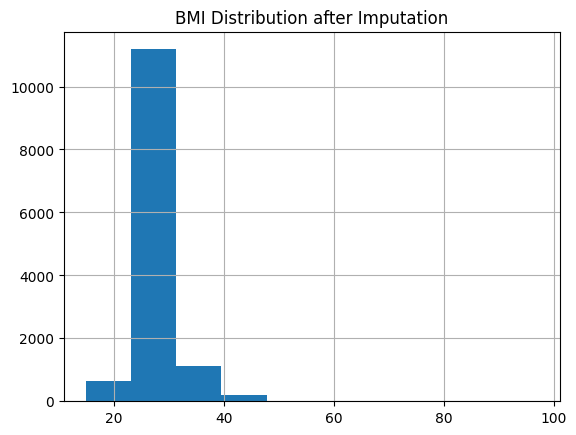

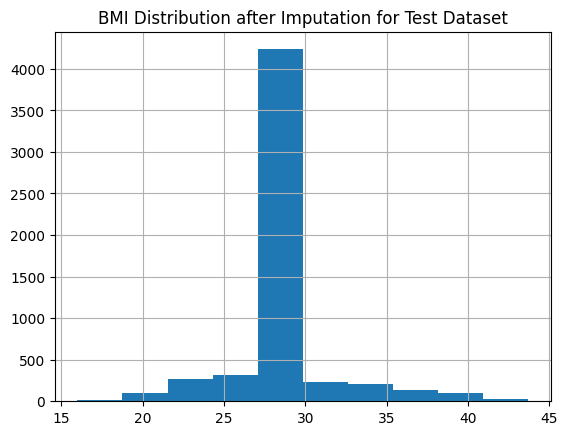

In [16]:
# bmi - If Available, will show available BMI information (Earliest BMI recording post metastatic date)

# Calculate the mean BMI (excluding missing values)
initial_mean_bmi = train_dataset['bmi'].mean()
initial_mean_bmi_test = test_dataset['bmi'].mean()

# Impute missing BMI values using mean BMI
train_dataset['bmi'] = train_dataset['bmi'].fillna(initial_mean_bmi)
test_dataset['bmi'] = test_dataset['bmi'].fillna(initial_mean_bmi_test)

# Calculate the mean BMI after imputation
final_mean_bmi = train_dataset['bmi'].mean()
final_mean_bmi_test = test_dataset['bmi'].mean()

# Print the initial and final mean BMI for comparison
print(f"Initial mean BMI: {initial_mean_bmi}")
print(f"Final mean BMI after imputation: {final_mean_bmi}")

print(f"Initial mean BMI for Test Dataset: {initial_mean_bmi_test}")
print(f"Final mean BMI after imputation for Test Dataset: {final_mean_bmi_test}")

# Histogram of BMI before imputation
plt.figure()
train_dataset['bmi'].hist()
plt.title('BMI Distribution after Imputation')
plt.show()

test_dataset['bmi'].hist()
plt.title('BMI Distribution after Imputation for Test Dataset')
plt.show()


In [17]:
# patient_race - Asian, African American, Hispanic or Latino, White, Other Race

# Calculate the most frequent patient_race for each patient_zip3 group in training data
most_frequent_race_zip = train_dataset.groupby('patient_zip3')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Calculate the most frequent patient_race for each patient_state group in training data
most_frequent_race_state = train_dataset.groupby('patient_state')['patient_race'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Define the function to impute missing patient_race based on most frequent values from training data
def impute_patient_race(df):
    def impute_from_zip(row):
        if pd.isna(row['patient_race']):
            zip_mode = most_frequent_race_zip.get(row['patient_zip3'], None)
            return zip_mode if zip_mode is not None else row['patient_race']
        return row['patient_race']

    df['patient_race'] = df.apply(impute_from_zip, axis=1)
    
    def impute_from_state(row):
        if pd.isna(row['patient_race']):
            state_mode = most_frequent_race_state.get(row['patient_state'], None)
            return state_mode if state_mode is not None else row['patient_race']
        return row['patient_race']

    df['patient_race'] = df.apply(impute_from_state, axis=1)
    
    return df

# Apply the imputation function to the training and test datasets
train_dataset = impute_patient_race(train_dataset)
test_dataset = impute_patient_race(test_dataset)

In [18]:
# Check missing values in patient_race column of training dataset
train_missing_values = train_dataset['patient_race'].isnull().sum()

# Check missing values in patient_race column of test dataset
test_missing_values = test_dataset['patient_race'].isnull().sum()

print(f"Missing values in 'patient_race' column of training dataset: {train_missing_values}")
print(f"Missing values in 'patient_race' column of test dataset: {test_missing_values}")


Missing values in 'patient_race' column of training dataset: 0
Missing values in 'patient_race' column of test dataset: 0


In [19]:
# payer_type - payer type at Medicaid, Commercial, Medicare on the metastatic date

# Crosstabulation of payer_type and patient_state
crosstab_state = pd.crosstab(train_dataset['payer_type'], train_dataset['patient_state'])
print('Crosstabulation of payer_type and patient_state:')
print(crosstab_state)

# Crosstabulation of payer_type and patient_zip3
crosstab_zip3 = pd.crosstab(train_dataset['payer_type'], train_dataset['patient_zip3'])
print('\nCrosstabulation of payer_type and patient_zip3:')
print(crosstab_zip3)

# Crosstabulation of payer_type and patient_age
crosstab_patient_age = pd.crosstab(train_dataset['payer_type'], train_dataset['patient_age'])
print('\nCrosstabulation of payer_type and patient_age:')
print(crosstab_patient_age)

# Crosstabulation of payer_type and married
crosstab_married = pd.crosstab(train_dataset['payer_type'], train_dataset['married'])
print('\nCrosstabulation of payer_type and married:')
print(crosstab_married)

# Crosstabulation of payer_type and family_size
crosstab_family_size = pd.crosstab(train_dataset['payer_type'], train_dataset['family_size'])
print('\nCrosstabulation of payer_type and family_size:')
print(crosstab_family_size)

# Crosstabulation of payer_type and income_household_median
crosstab_income_household_median = pd.crosstab(train_dataset['payer_type'], train_dataset['income_household_median'])
print('\nCrosstabulation of payer_type and income_household_median:')
print(crosstab_income_household_median)

from scipy.stats import chi2_contingency

# Chi-square test of independence for payer_type and patient_state
chi2_state, p_state, _, _ = chi2_contingency(crosstab_state)
print(f'\nChi-square test of independence for payer_type and patient_state: Chi2 = {chi2_state}, p-value = {p_state}')

# Chi-square test of independence for payer_type and patient_zip3
chi2_zip3, p_zip3, _, _ = chi2_contingency(crosstab_zip3)
print(f'\nChi-square test of independence for payer_type and patient_zip3: Chi2 = {chi2_zip3}, p-value = {p_zip3}')

# Chi-square test of independence for payer_type and patient_age
chi2_patient_age, p_patient_age, _, _ = chi2_contingency(crosstab_patient_age)
print(f'\nChi-square test of independence for payer_type and patient_age: Chi2 = {chi2_patient_age}, p-value = {p_patient_age}')

# Chi-square test of independence for payer_type and marital_status
chi2_married, p_married, _, _ = chi2_contingency(crosstab_married)
print(f'\nChi-square test of independence for payer_type and marital_status: Chi2 = {chi2_married}, p-value = {p_married}')

# Chi-square test of independence for payer_type and family_size
chi2_family_size, p_family_size, _, _ = chi2_contingency(crosstab_family_size)
print(f'\nChi-square test of independence for payer_type and family_size: Chi2 = {chi2_family_size}, p-value = {p_family_size}')

# Chi-square test of independence for payer_type and income_household_median
chi2_income_household_median, p_income_household_median, _, _ = chi2_contingency(crosstab_income_household_median)
print(f'\nChi-square test of independence for payer_type and income_household_median: Chi2 = {chi2_income_household_median}, p-value = {p_income_household_median}')

Crosstabulation of payer_type and patient_state:
patient_state       AK  AL  AR   AZ   CA   CO  DC  DE   FL   GA  ...  SC  SD  \
payer_type                                                       ...           
COMMERCIAL           6  27  45   86  968  128   4   6  184  244  ...  44  13   
MEDICAID             1   0   0  105  664    7  10   6  195  234  ...  45   0   
MEDICARE ADVANTAGE   0   2  29   37  366   48   0   0  132   37  ...   9   0   

patient_state       TN   TX  UT   VA  WA   WI  WV  WY  
payer_type                                             
COMMERCIAL          65  763  19  261  96  121   8   4  
MEDICAID            37  153   4   68  51   19  19   0  
MEDICARE ADVANTAGE   9   93   5   13  28   53   0   1  

[3 rows x 44 columns]

Crosstabulation of payer_type and patient_zip3:
patient_zip3        100  101  103  104  105  106  107  108  109  110  ...  \
payer_type                                                            ...   
COMMERCIAL           36    1   21   26   24 

In [20]:
# Group data by columns with high chi-square values
group_cols = ['patient_zip3', 'patient_age', 'married', 'income_household_median']
grouped_data = train_dataset.groupby(group_cols)

# Calculate the most frequent payer_type for each group
def get_most_frequent_payer_type(series):
    # Calculate the mode
    mode = series.mode()
    # Return the first mode if exists, else return None
    return mode.iloc[0] if not mode.empty else None

most_frequent_payer_type = grouped_data['payer_type'].agg(get_most_frequent_payer_type)

# Define a function to impute missing values in payer_type
def impute_payer_type(row):
    # Get the group key based on the chosen columns
    group_key = tuple(row[col] for col in group_cols)
    
    # Get the most frequent payer_type for the group
    most_frequent_value = most_frequent_payer_type.get(group_key, None)
    
    # If the most frequent value exists and the current payer_type is missing, impute it
    if pd.isna(row['payer_type']) and most_frequent_value is not None:
        return most_frequent_value
    
    # Otherwise, return the existing value
    return row['payer_type']

# Apply the impute_payer_type function to impute missing values in payer_type
train_dataset['payer_type'] = train_dataset.apply(impute_payer_type, axis=1)
test_dataset['payer_type'] = test_dataset.apply(impute_payer_type, axis=1)

# Calculate the overall mode of the payer_type column
overall_mode = train_dataset['payer_type'].mode()[0]
overall_mode = test_dataset['payer_type'].mode()[0]

# Impute remaining missing values in payer_type with the overall mode
train_dataset['payer_type'] = train_dataset['payer_type'].fillna(overall_mode)
test_dataset['payer_type'] = test_dataset['payer_type'].fillna(overall_mode)


In [21]:
# Check missing values in payer_type column of training dataset
train_missing_values = train_dataset['payer_type'].isnull().sum()

# Check missing values in payer_type column of test dataset
test_missing_values = test_dataset['payer_type'].isnull().sum()

print(f"Missing values in 'payer_type' column of training dataset: {train_missing_values}")
print(f"Missing values in 'payer_type' column of test dataset: {test_missing_values}")


Missing values in 'payer_type' column of training dataset: 0
Missing values in 'payer_type' column of test dataset: 0


In [22]:
# Select the numeric columns between 'population' and 'Average of Dec-18'
numeric_columns = train_dataset.loc[:, 'population':'Average_of_Dec_18'].select_dtypes(include=np.number).columns
numeric_columns_test = test_dataset.loc[:, 'population':'Average_of_Dec_18'].select_dtypes(include=np.number).columns

# Group the datasets by 'patient_zip3' and fill missing values with median within each group
train_dataset[numeric_columns] = train_dataset.groupby('patient_zip3')[numeric_columns].transform(lambda x: x.fillna(x.median()))
test_dataset[numeric_columns_test] = test_dataset.groupby('patient_zip3')[numeric_columns_test].transform(lambda x: x.fillna(x.median()))

# Perform forward fill for any remaining missing values
train_dataset[numeric_columns] = train_dataset[numeric_columns].ffill()
test_dataset[numeric_columns_test] = test_dataset[numeric_columns_test].ffill()

In [23]:
#Final check for any remaining missing values in the dataset

# Check for missing values in train_dataset
missing_values_train = train_dataset.isnull().sum()

# Check for missing values in test_dataset
missing_values_test = test_dataset.isnull().sum()

# Print missing values count for train_dataset
if missing_values_train.sum() == 0:
    print("No missing values in Train Dataset")
else:
    print("Columns with missing values in Train Dataset:")
    print(missing_values_train[missing_values_train > 0])

# Print missing values count for test_dataset
if missing_values_test.sum() == 0:
    print("No missing values in Test Dataset")
else:
    print("Columns with missing values in Test Dataset:")
    print(missing_values_test[missing_values_test > 0])

No missing values in Train Dataset
No missing values in Test Dataset


### 2.4 Exploratory Data Analysis (EDA)

Segmenting the target variable into ranges for visualization purposes can be helpful, when dealing with numerical variables that have a wide range of values. This approach can provide more insights and make the visualizations more interpretable. 

In [24]:
# Define bin edges
bin_edges = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 365]

# Create labels for the bins
bin_labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-365']

# Segment the target variable into bins
segmented_series = pd.cut(train_dataset['metastatic_diagnosis_period'], bins=bin_edges, labels=bin_labels)

# Add segmented series to train_dataset
train_dataset = pd.concat([train_dataset, segmented_series.rename('metastatic_diagnosis_period_segmented')], axis=1)


**Distribution of Patient Age**

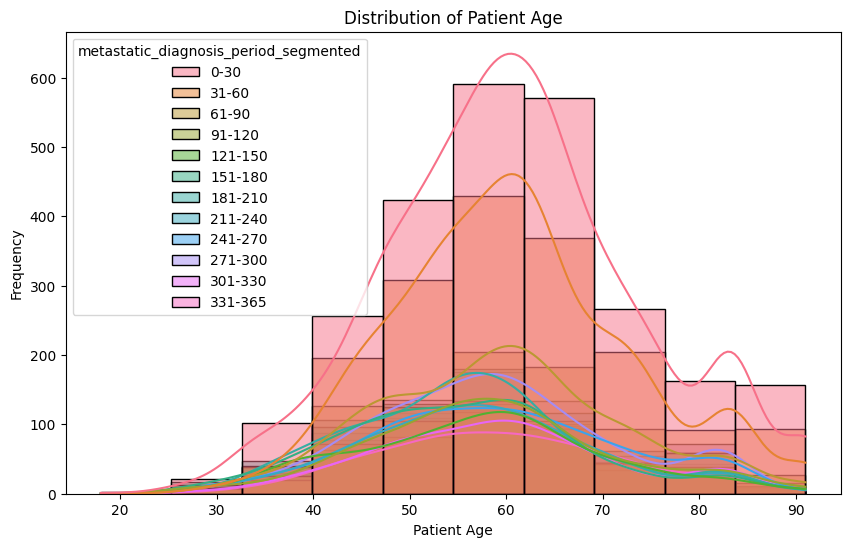

In [25]:

# Replace inf values with NaN
train_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

# Explicitly handle 'observed' in grouping if needed (though not directly used here)
# Ensure we cover any indirect operations that might use 'observed'
grouped_data = train_dataset.groupby('metastatic_diagnosis_period_segmented', observed=False)

# Histogram of patient_age
plt.figure(figsize=(10, 6))
sns.histplot(data=train_dataset, x='patient_age', kde=True, hue='metastatic_diagnosis_period_segmented', bins=10)

plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()



**Patient Age Distribution by Race and Diagnosis Period**

This box plot shows the distribution of patient age across different races, with diagnosis period represented by different colors. It helps you identify if there are any variations in age distribution based on race and diagnosis period.

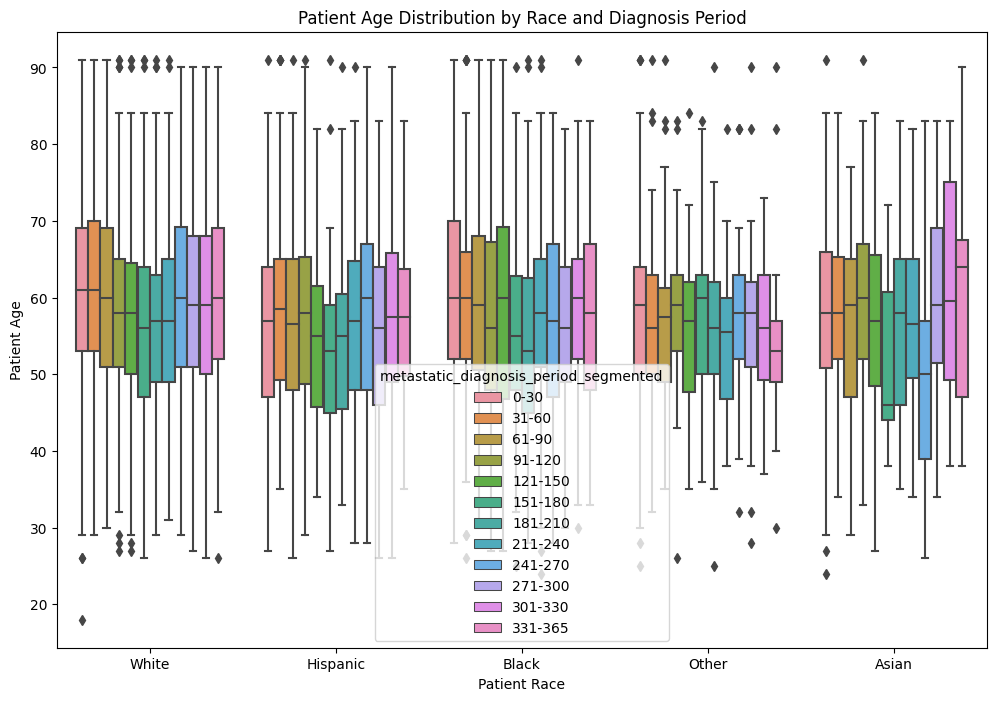

In [26]:
#Box Plots:

# Box plot of patient_age vs. patient_race
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_dataset, x='patient_race', y='patient_age', hue='metastatic_diagnosis_period_segmented')
plt.title('Patient Age Distribution by Race and Diagnosis Period')
plt.xlabel('Patient Race')
plt.ylabel('Patient Age')
plt.show()


**Frequency of Patient Race by Diagnosis Period**

This bar plot shows the frequency counts of patient races across different diagnosis periods. It helps you understand the distribution of diagnosis periods within each race category.

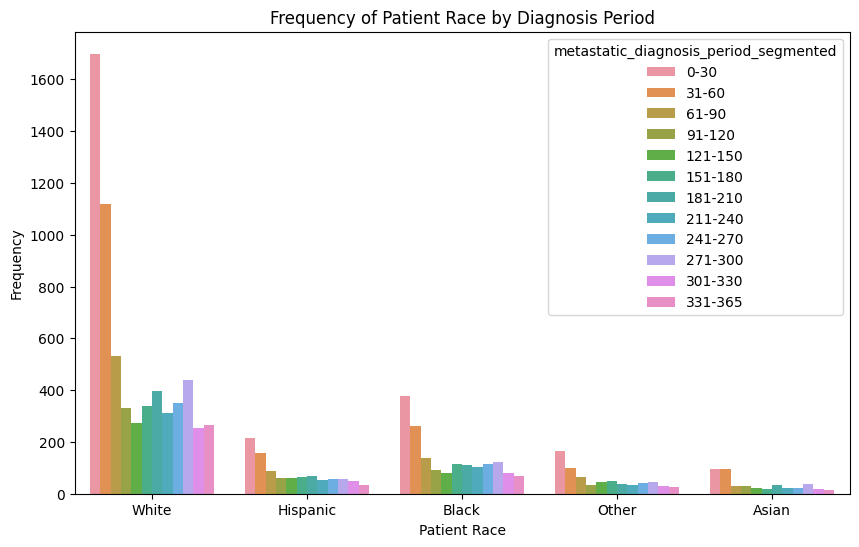

In [27]:
#Bar Plots:

# Bar plot of patient_race
plt.figure(figsize=(10, 6))
sns.countplot(data=train_dataset, x='patient_race', hue='metastatic_diagnosis_period_segmented')
plt.title('Frequency of Patient Race by Diagnosis Period')
plt.xlabel('Patient Race')
plt.ylabel('Frequency')
plt.show()


**Patient Age vs. BMI**

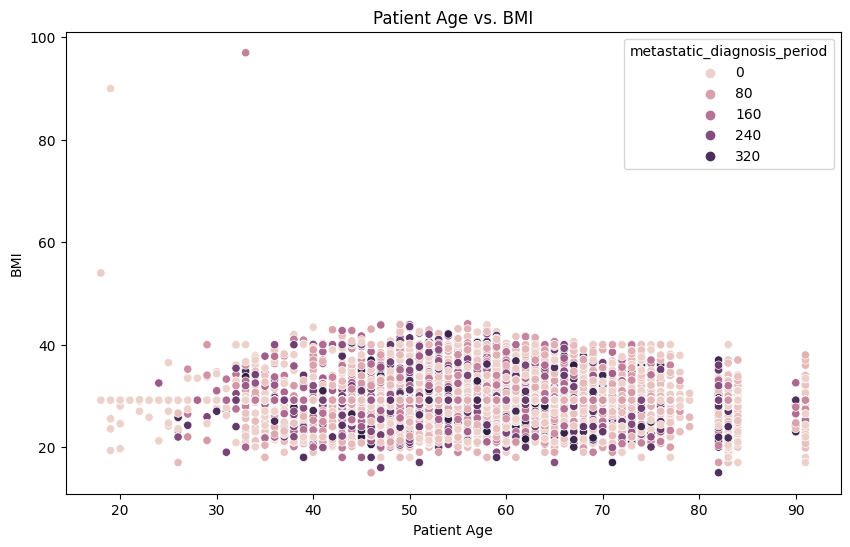

In [28]:
# Scatter plot of patient_age vs. bmi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_dataset, x='patient_age', y='bmi', hue='metastatic_diagnosis_period')
plt.title('Patient Age vs. BMI')
plt.xlabel('Patient Age')
plt.ylabel('BMI')
plt.show()


The above graph shows that BMI does not have significant impact on either the age or the metastatic diagnosis period.

**Patient Age vs. BMI vs. Houseold Income**

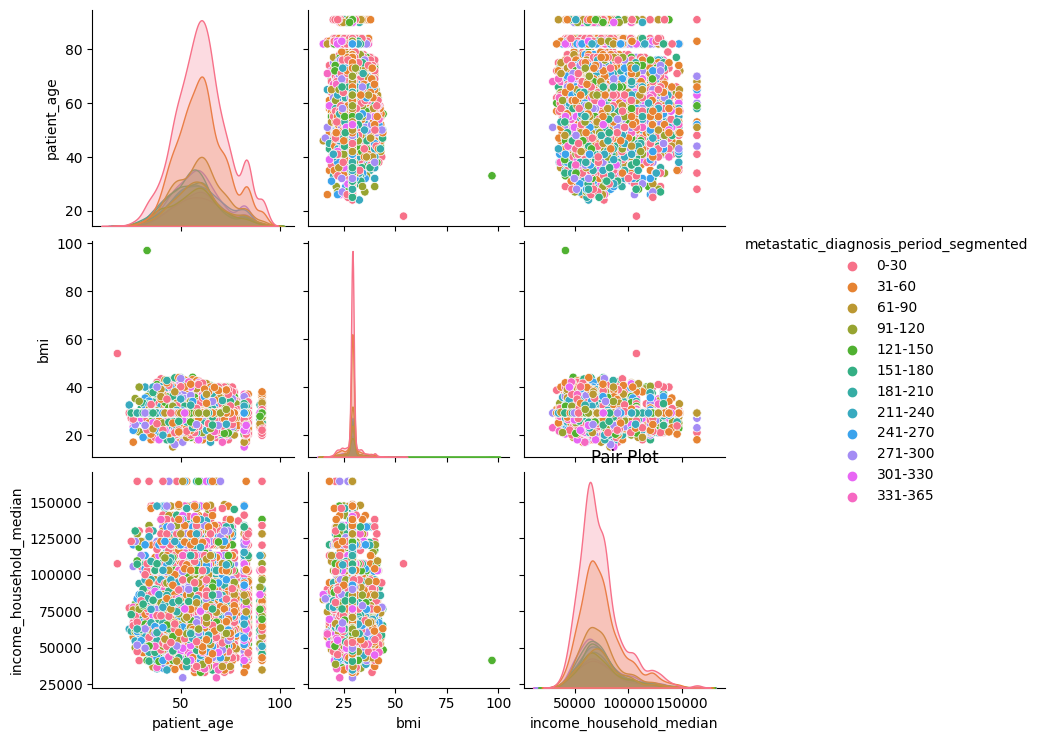

In [29]:
# Pair plot
sns.pairplot(train_dataset[['patient_age', 'bmi', 'income_household_median', 'metastatic_diagnosis_period_segmented']], hue='metastatic_diagnosis_period_segmented')
plt.title('Pair Plot')
plt.show()


**Count plot for Patient Race Distribution**

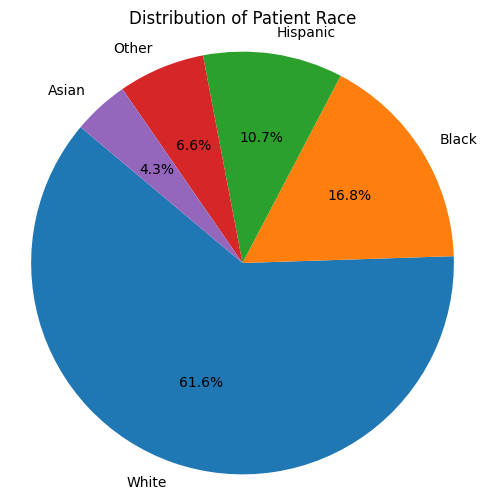

In [30]:
# Count the occurrences of each race
race_counts = train_dataset['patient_race'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Patient Race')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Income vs Detection Time**

In [31]:
import plotly.express as px

# Create a bar plot
fig = px.bar(train_dataset, 
             x='income_household_median', 
             y='metastatic_diagnosis_period_segmented', 
#              color = 'income_individual_median',
             hover_data=['married', 'patient_zip3', 'population', 'density'],
             labels={'income_household_median': 'Income Household Median',
                     'metastatic_diagnosis_period_segmented': 'Metastatic Diagnosis Period',
                     'income_individual_median': 'income_individual_median'},
             title='Income Household Median vs. Metastatic Diagnosis Period',
#              template='plotly_dark',
             color_continuous_scale='Viridis')  # Change the color scale here

# Customize the layout
fig.update_layout(xaxis_title='Income Household Median', 
                  yaxis_title='Metastatic Diagnosis Period',
                  barmode='group',
                  hovermode='closest'
                  )  # Custom color bar title

# Show the plot
fig.show()


**Payer Type vs Detection Time**

In [32]:
# Group the data by payer type and calculate the average metastatic diagnosis period
grouped_data = train_dataset.groupby('payer_type')['metastatic_diagnosis_period'].mean().reset_index()

# Create a grouped bar plot
fig = px.bar(grouped_data, x='payer_type', y='metastatic_diagnosis_period', 
             title='Impact of Payer Type on Metastatic Diagnosis Period')

# Customize the layout
fig.update_layout(xaxis_title='Payer Type', 
                  yaxis_title='Average Metastatic Diagnosis Period',
                  hovermode='closest')

# Show the plot
fig.show()


**patient_race vs the average metastatic diagnosis period**

In [33]:
# Group the data by patient_race and calculate the average metastatic diagnosis period
grouped_data = train_dataset.groupby('patient_race')['metastatic_diagnosis_period'].mean().reset_index()

# Create a grouped bar plot
fig = px.bar(grouped_data, x='patient_race', y='metastatic_diagnosis_period', 
             title='Impact of patient_race on Metastatic Diagnosis Period')

# Customize the layout
fig.update_layout(xaxis_title='patient_race', 
                  yaxis_title='Average Metastatic Diagnosis Period',
                  hovermode='closest')

# Show the plot
fig.show()


The below plot helps to identify if certain patient races tend to reside in areas with higher or lower percentages of other racial groups.
For example, if race_white shows a higher median percentage for patient_race categorized as White, it indicates that white patients tend to live in areas with a higher percentage of white residents.

Outliers in the boxplots indicate zip codes where the race distribution significantly deviates from the typical values for that patient race. This could point to unusual demographic patterns or potential errors in the data.

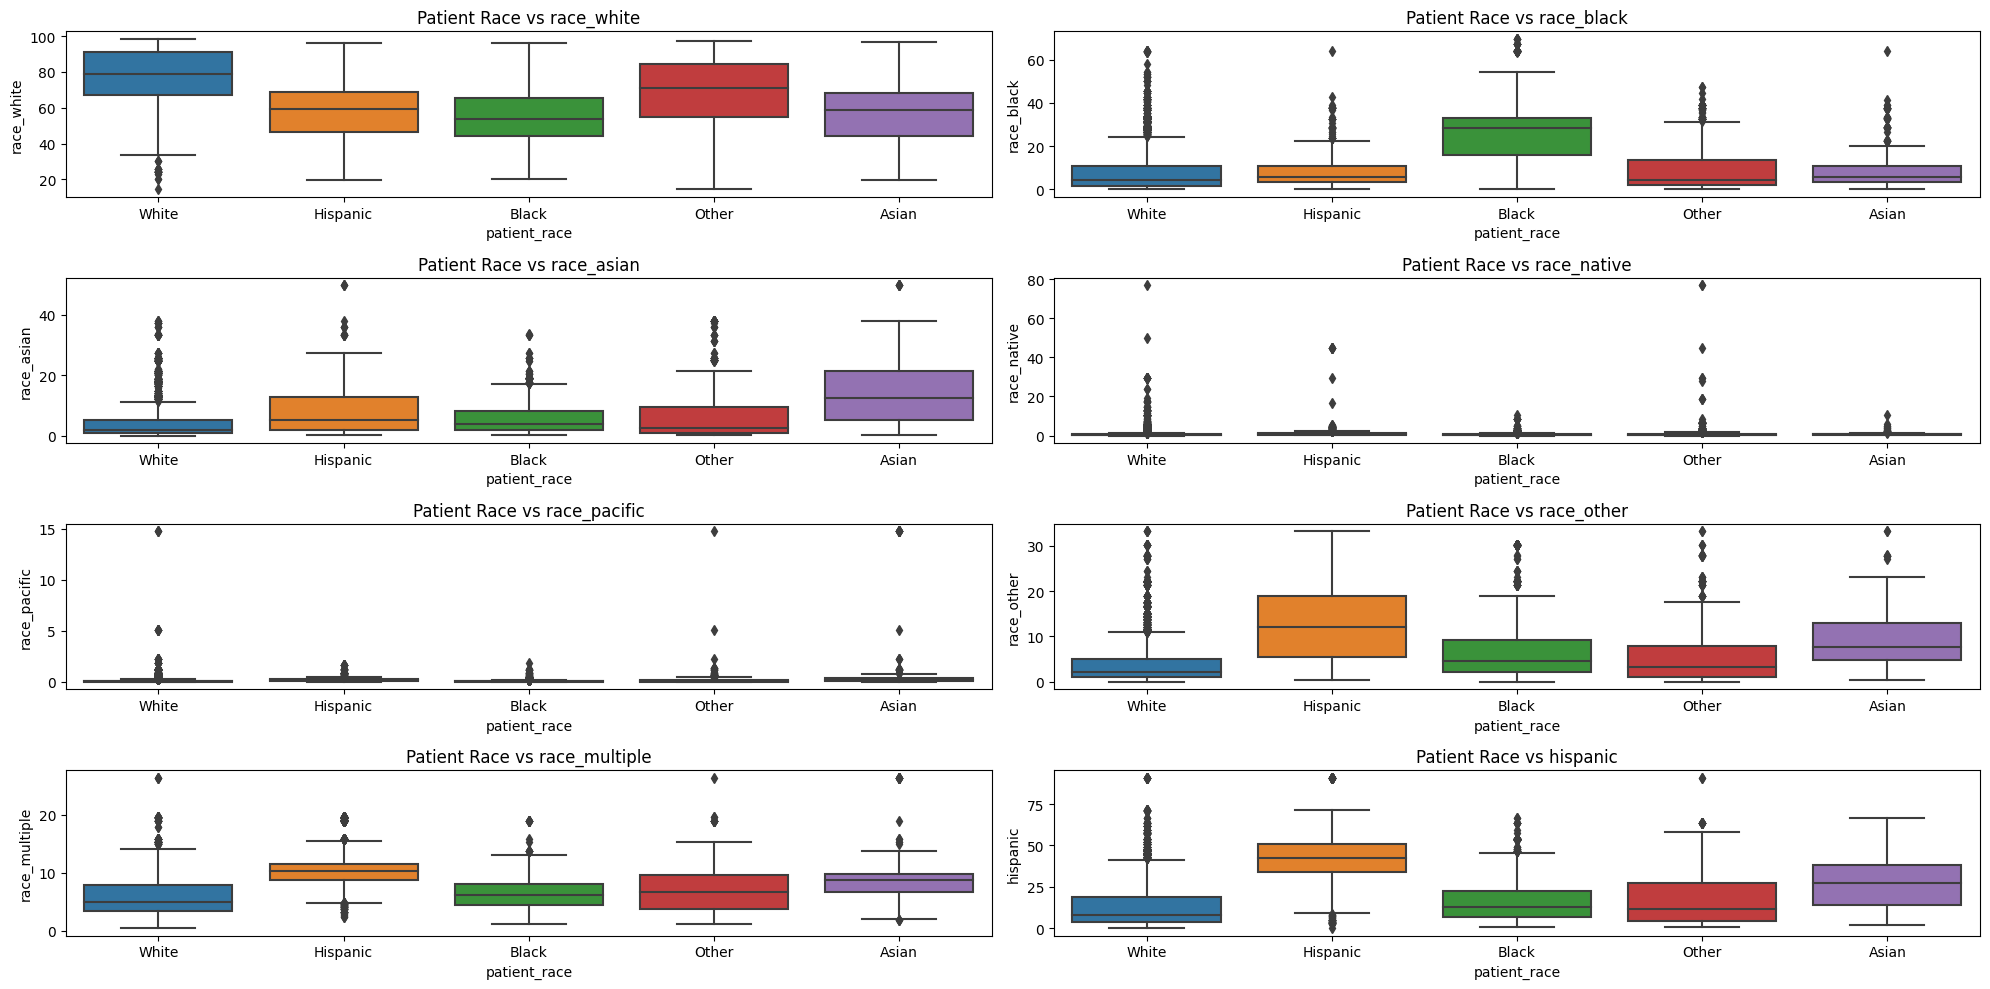

In [34]:
# Plot the distribution of patient_race with each race_columns

race_columns = [
    'race_white', 'race_black', 'race_asian', 'race_native',
    'race_pacific', 'race_other', 'race_multiple', 'hispanic'
]

plt.figure(figsize=(20, 10))
for i, col in enumerate(race_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x='patient_race', y=col, data=train_dataset)
    plt.title(f'Patient Race vs {col}')
plt.tight_layout()
plt.show()


In [35]:
# Summarize the findings
summary = {}

# Check for outliers
numeric_columns = train_dataset.select_dtypes(include=np.number).columns
summary['Outliers'] = train_dataset[numeric_columns].apply(lambda x: x[x > x.quantile(0.95)].count())

# Compare patient race with zip code race distribution
race_comparison_results = []
for race in train_dataset['patient_race'].unique():
    # Create a mask for the current race
    mask = train_dataset['patient_race'] == race
    # Calculate the average distribution for each race column
    avg_race_distribution = train_dataset.loc[mask, race_columns].mean()
    race_comparison_results.append((race, avg_race_distribution))
summary['Race Comparison'] = race_comparison_results

# Display the summary
print(summary)

{'Outliers': patient_id                     659
patient_zip3                   626
patient_age                    578
bmi                            658
population                     584
                              ... 
Average_of_Sep_18              633
Average_of_Oct_18              634
Average_of_Nov_18              603
Average_of_Dec_18              614
metastatic_diagnosis_period    644
Length: 141, dtype: int64, 'Race Comparison': [('White', race_white       77.115689
race_black        8.346203
race_asian        3.981912
race_native       0.885089
race_pacific      0.114831
race_other        3.789729
race_multiple     5.766397
hispanic         13.430658
dtype: float64), ('Hispanic', race_white       59.048188
race_black        7.673227
race_asian        8.397846
race_native       1.114634
race_pacific      0.202303
race_other       12.773113
race_multiple    10.792594
hispanic         42.099097
dtype: float64), ('Black', race_white       54.139797
race_black       26.441292
ra

**Insights from the Data**

**Outliers**

The first part of the output indicates the number of outliers identified for various columns. Outliers can significantly impact the analysis and interpretation of the data. Here are a few insights based on the outliers detected:

   - Columns such as patient_zip3, patient_age, bmi, population, and density have a high number of outliers.
   - High outliers in these columns could suggest data quality issues or genuine variability in the population characteristics.
   - Columns like poverty, limited_english, commute_time, health_uninsured, and veteran also have numerous outliers.
   - These could indicate areas with unusually high or low values compared to the general distribution, which may be worth investigating further for targeted interventions or policy-making.

**Race Comparison**

The second part of the output provides a comparison of patient race against the distribution of race-related columns. Here's what can be inferred from it:

   - These figures represent the average racial makeup of the zip codes for each patient race. For example, the zip codes where patients identified as White live have, on average, 77.12% race_white, 8.35% race_black, and so on
   - For patients identified as White, their zip codes are predominantly race_white (77.12%) with smaller percentages of other races.
   - For patients identified as Hispanic, their zip codes have a significant percentage of hispanic (42.10%) and a more diverse racial makeup compared to the White group.
   - Patients identified as Black live in zip codes with a higher percentage of race_black (26.44%) compared to other groups.


**Relationship between different age-related columns**

The objective is to visualize how the different age-related columns (age_under_10, age_10_to_19, etc.) are distributed across different patient age bins. This can help identify patterns and outliers in the data related to age.

What the Plots Show:
Box Plot Insights:
Each box plot will show the distribution of a particular race-related column for different values of patient_age.
For example, a plot of patient_age vs. race_white will show how the percentage of white residents varies across different patient ages.
Potential Usefulness:
Age-Race Distribution Patterns:
Age-Specific Trends:
The plots can reveal if certain age groups are associated with higher or lower percentages of specific races in their zip codes.
This could indicate demographic trends such as younger populations living in more racially diverse areas.

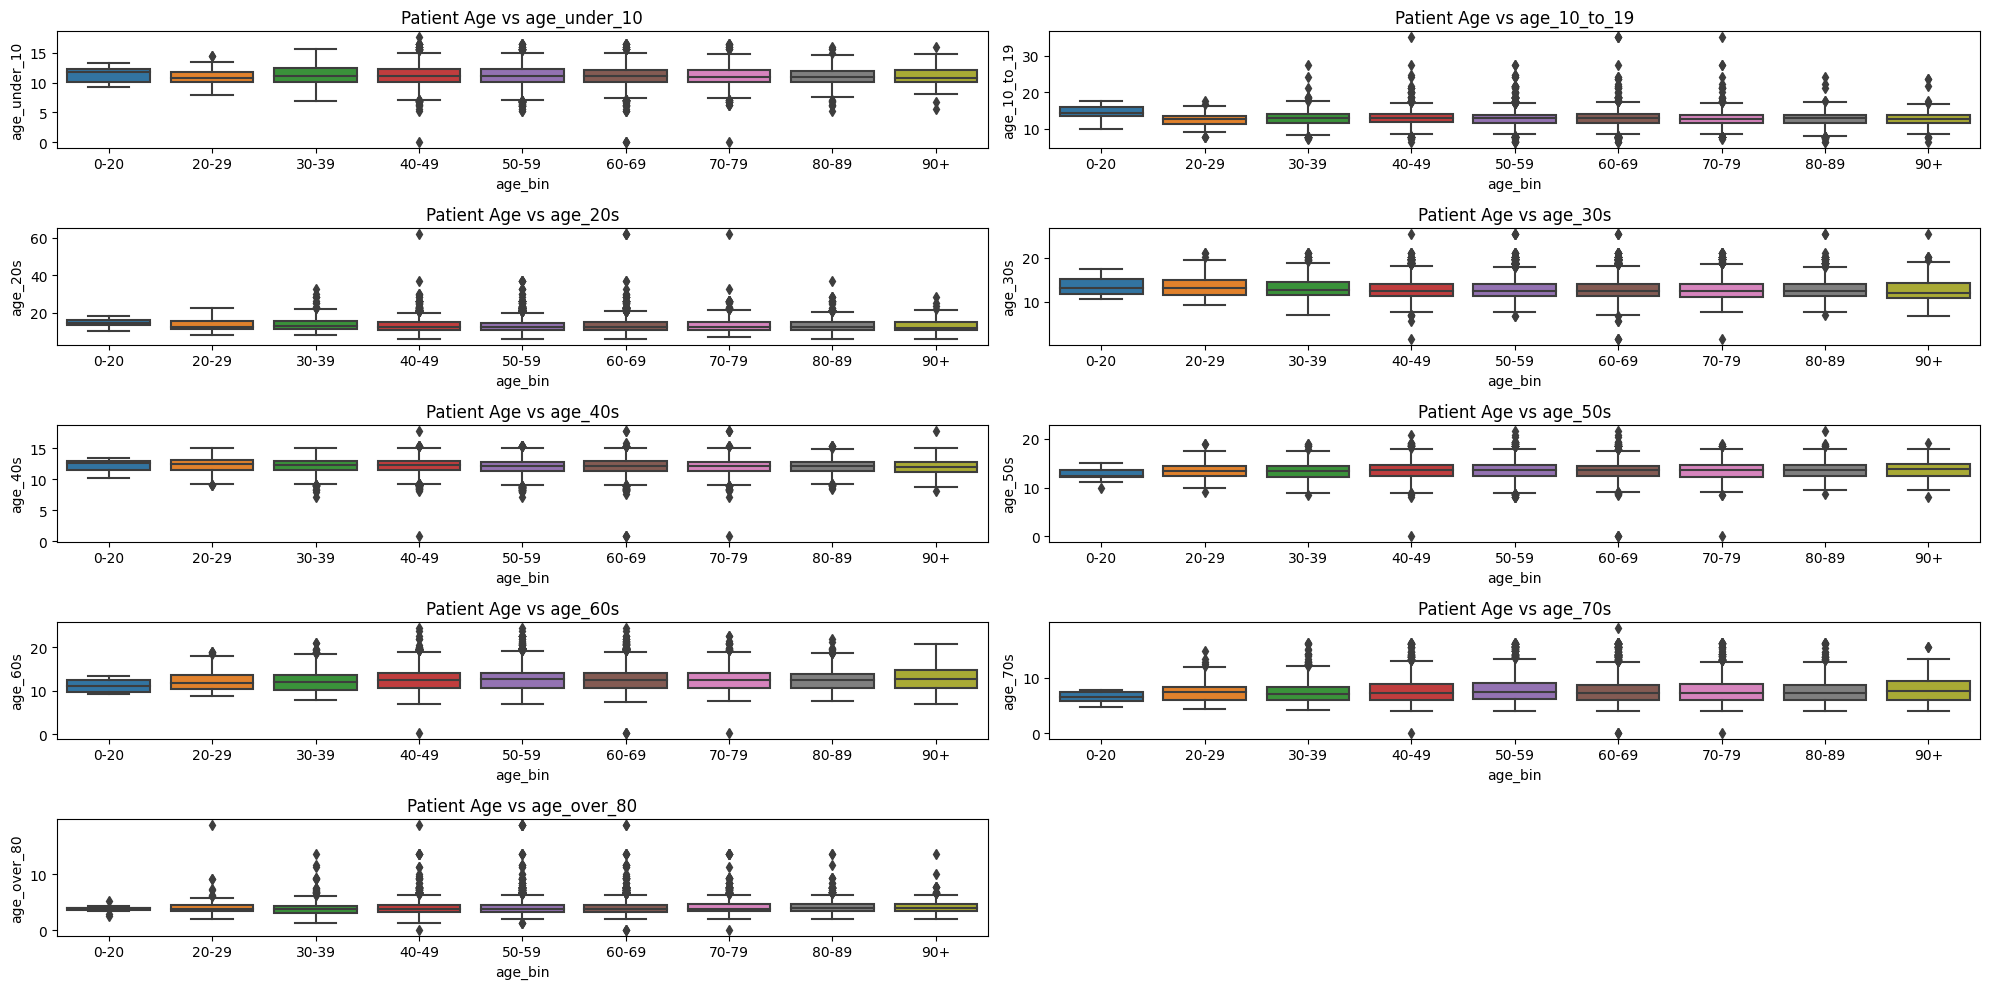

In [36]:
# Plot the distribution of patient_age with each age_columns

age_columns = [
    'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s',
    'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80'
]

#Define the boundaries for age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create age bins
train_dataset['age_bin'] = pd.cut(train_dataset['patient_age'], bins=age_bins, labels=age_labels, right=False)

#Visualize the plot
plt.figure(figsize=(20, 10))
for i, col in enumerate(age_columns, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x='age_bin', y=col, data=train_dataset)
    plt.title(f'Patient Age vs {col}')
plt.tight_layout()
plt.show()

**Distribution of States**

In [37]:
import plotly.express as px

# Count of patient states
state_counts = train_dataset['patient_state'].value_counts().reset_index()
state_counts.columns = ['patient_state', 'count']

# Plotly bar plot with hover
fig = px.bar(state_counts, x='patient_state', y='count', text='count',
             labels={'count': 'Count', 'patient_state': 'Patient State'},
             title='Overall Distribution of Patient States',
             template='plotly_white')
fig.update_traces(marker_color='blue', marker_line_color='black',
                  marker_line_width=1, opacity=0.6, textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


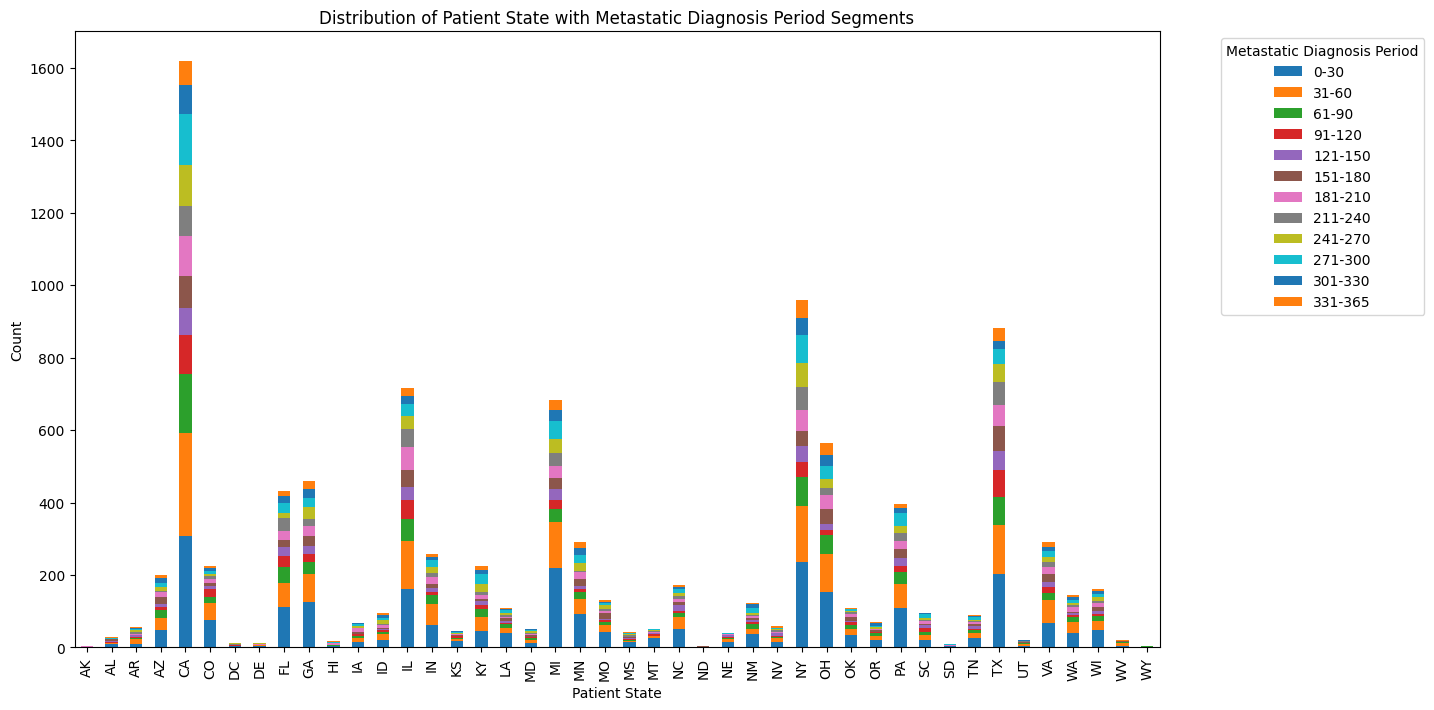

In [38]:
# Create a crosstab of patient_state and metastatic_diagnosis_period_segmented
crosstab = pd.crosstab(train_dataset['patient_state'], train_dataset['metastatic_diagnosis_period_segmented'])

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Distribution of Patient State with Metastatic Diagnosis Period Segments')
plt.xlabel('Patient State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Metastatic Diagnosis Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Outliers in numerical columns**

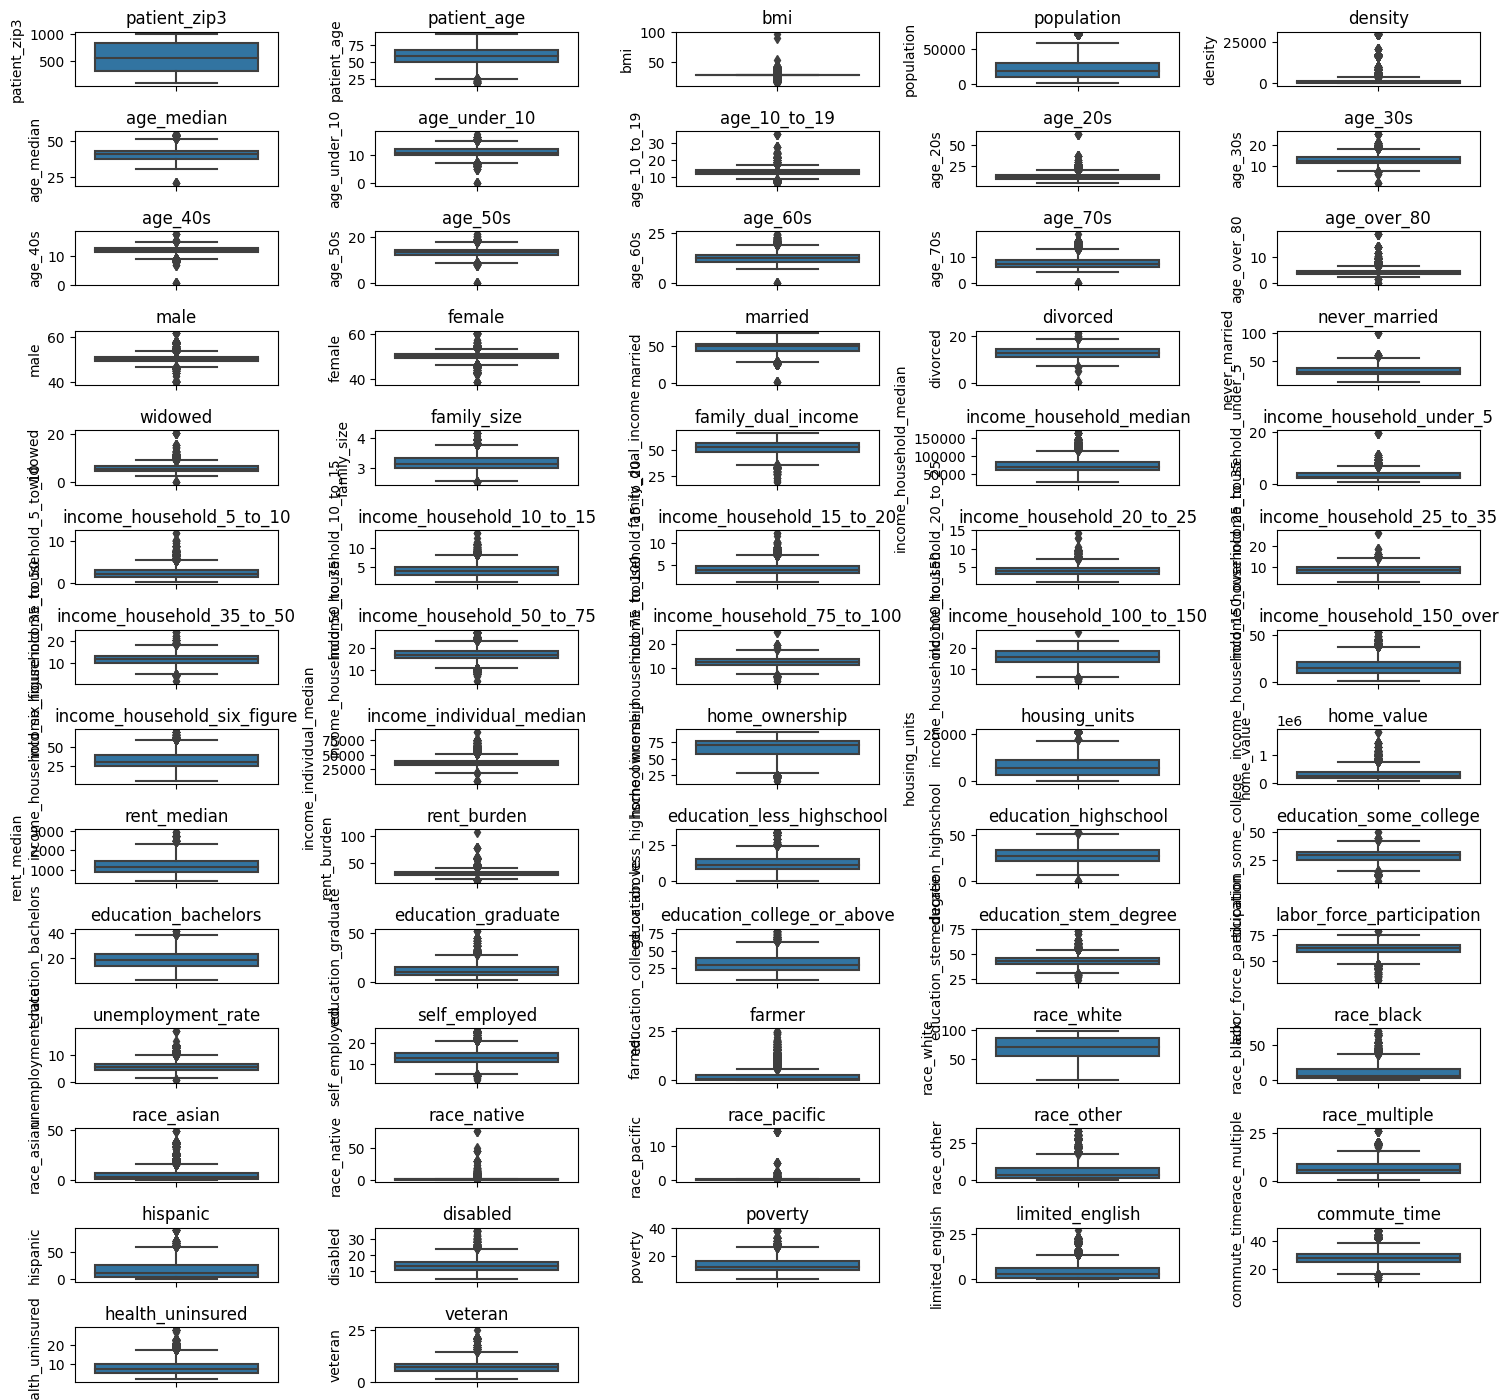

In [39]:
# Plot boxplots for numeric columns to detect outliers
# numeric_columns = train_dataset.select_dtypes(include=[np.number]).columns
numeric_columns = train_dataset.loc[:, 'patient_zip3':'veteran'].select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(20, 5, i)
    sns.boxplot(y=train_dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 2.5 Treat Outliers

In [40]:
# Ensuring only numeric columns are considered for outlier detection
numeric_cols = train_dataset.select_dtypes(include=['number'])

# Detecting outliers using IQR method on numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the numeric columns
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
outlier_indices = numeric_cols[outliers].index

print('Number of outliers found:', len(outlier_indices))

# Cap Outliers at a certain threshold
for col in numeric_cols.columns:
    # Cast upper and lower bounds to integer
    upper_bound_int = int(upper_bound[col])
    lower_bound_int = int(lower_bound[col])

    # Cap outliers by setting them to upper or lower bound
    train_dataset.loc[train_dataset[col] > upper_bound[col], col] = upper_bound_int
    train_dataset.loc[train_dataset[col] < lower_bound[col], col] = lower_bound_int

print('Outliers capped at a certain threshold.')


Number of outliers found: 9684
Outliers capped at a certain threshold.


In [41]:
#Treat outliers in test dataset
numeric_cols_test = test_dataset.select_dtypes(include=['number'])

# Detecting outliers using IQR method on numeric columns - Test dataset
Q1 = numeric_cols_test.quantile(0.25)
Q3 = numeric_cols_test.quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers - Test dataset
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the numeric columns - Test dataset
outliers_test = ((numeric_cols_test < lower_bound) | (numeric_cols_test > upper_bound)).any(axis=1)
outlier_indices = numeric_cols_test[outliers_test].index

print('Number of outliers found - Test dataset:', len(outlier_indices))

# Cap Outliers at a certain threshold -Test Dataset
for col in numeric_cols_test.columns:
    # Cast upper and lower bounds to integer
    upper_bound_int = int(upper_bound[col])
    lower_bound_int = int(lower_bound[col])

    # Cap outliers by setting them to upper or lower bound
    test_dataset.loc[test_dataset[col] > upper_bound[col], col] = upper_bound_int
    test_dataset.loc[test_dataset[col] < lower_bound[col], col] = lower_bound_int

print('Outliers capped at a certain threshold in test_dataset.')

Number of outliers found - Test dataset: 4204
Outliers capped at a certain threshold in test_dataset.


## 3. Feature Engineering

Feature engineering is a crucial step in the data preparation process as it transforms raw data into meaningful features that improve the performance of machine learning models. The goal is to enhance the predictive power of the model by making the most relevant information accessible for the learning algorithm. This step focuses on:

* **Encoding Categorical Variables:** Convert categorical variables with ordinal relationships into numerical format using Label encoding or use one-hot encoding to transform categorical variables with nominal relationships into binary columns for each category.


* **Feature Scaling:** Scale features to a range of [0, 1] to bring all features to a common scale without distorting differences in the ranges of values.


* **Feature Importance:** Use models like Random Forest, XGBoost, or feature importance scores to select the most significant features.


* **Feature Selection:** Remove features with low variance that do not contribute much to the target variable.



### 3.1 Encoding Variables

* **income_individual_median:** First convert the continuous column into categorical by creating bins and then apply label encoding since this feature has an ordinal relationship.

* **breast_cancer_diagnosis_code:** Count the occurrences of each category in the categorical column. Replace each category in the column with its frequency of occurrence.

* **metastatic_cancer_diagnosis_code:** Count the occurrences of each category in the categorical column. Replace each category in the column with its frequency of occurrence.

* **Categorical Columns:** Encode all the remaining categorical columns like Region, Divison, State, payer_type and Race.

In [42]:
# income_individual_median
print (train_dataset['income_individual_median'].describe())

#binning the income feature
# Define bin edges based on quartiles or custom thresholds
bin_edges = [0, 30000, 65000, 100000, np.inf]
bin_labels = ['Low', 'Medium', 'High', 'Very High']

# Bin 'income_individual_median'
train_dataset['income_category'] = pd.cut(train_dataset['income_individual_median'], bins=bin_edges, labels=bin_labels)
test_dataset['income_category'] = pd.cut(test_dataset['income_individual_median'], bins=bin_edges, labels=bin_labels)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the income_category column
train_dataset['income_category_encoded'] = label_encoder.fit_transform(train_dataset['income_category'])
test_dataset['income_category_encoded'] = label_encoder.fit_transform(test_dataset['income_category'])

# Display the encoded values
print('\n',train_dataset[['income_individual_median','income_category', 'income_category_encoded']].head(10))



count    13173.000000
mean     36210.891975
std       7345.163779
min      18580.000000
25%      31255.740000
50%      35211.020000
75%      39705.730000
max      52380.000000
Name: income_individual_median, dtype: float64

    income_individual_median income_category  income_category_encoded
0                  24048.55             Low                        0
1                  28028.04             Low                        0
2                  32818.54          Medium                        1
3                  36053.40          Medium                        1
4                  34754.64          Medium                        1
5                  35960.42          Medium                        1
6                  31690.84          Medium                        1
7                  44135.30          Medium                        1
8                  29375.79             Low                        0
9                  25926.82             Low                        0


In [43]:
# Frequency Encoding for 'breast_cancer_diagnosis_code'

# Calculate frequencies for training dataset
frequency_map = train_dataset['breast_cancer_diagnosis_code'].value_counts(normalize=True)

# Calculate frequencies for test dataset
frequency_map_test = test_dataset['breast_cancer_diagnosis_code'].value_counts(normalize=True)

# Replace categories with frequencies in training dataset
train_dataset['breast_cancer_diagnosis_code_frequency'] = train_dataset['breast_cancer_diagnosis_code'].map(frequency_map)

# Replace categories with frequencies in test dataset
test_dataset['breast_cancer_diagnosis_code_frequency'] = test_dataset['breast_cancer_diagnosis_code'].map(frequency_map_test)

# Print the result to check the encoding
print(train_dataset[['breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_code_frequency']].drop_duplicates().to_string(index=False))



breast_cancer_diagnosis_code  breast_cancer_diagnosis_code_frequency
                      C50912                                0.139224
                      C50412                                0.068853
                        1749                                0.147802
                      C50911                                0.136871
                        1748                                0.025583
                      C50411                                0.070371
                      C50212                                0.022167
                      C50811                                0.036362
                      C50919                                0.114173
                      C50211                                0.018902
                        1744                                0.030517
                      C50012                                0.007895
                      C50112                                0.015714
                      C50812      

In [44]:
# Frequency Encoding for metastatic_cancer_diagnosis_code

# Calculate frequencies
frequency_map = train_dataset['metastatic_cancer_diagnosis_code'].value_counts(normalize=True)
frequency_map_test = test_dataset['metastatic_cancer_diagnosis_code'].value_counts(normalize=True)

# Replace categories with frequencies
train_dataset['metastatic_cancer_diagnosis_code_frequency'] = train_dataset['metastatic_cancer_diagnosis_code'].map(frequency_map)
test_dataset['metastatic_cancer_diagnosis_code_frequency'] = test_dataset['metastatic_cancer_diagnosis_code'].map(frequency_map_test)

# Print the result to check the encoding
print(train_dataset[['metastatic_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code_frequency']].drop_duplicates().to_string(index=False))


metastatic_cancer_diagnosis_code  metastatic_cancer_diagnosis_code_frequency
                            C773                                    0.554771
                           C7951                                    0.145905
                            C786                                    0.002657
                            C799                                    0.019661
                            C792                                    0.014196
                           C7989                                    0.025051
                           C7981                                    0.034389
                           C7801                                    0.012981
                           C7800                                    0.032035
                            C787                                    0.028240
                            C779                                    0.053139
                           C7931                                    0.021028

In [45]:
categorical_columns = train_dataset.select_dtypes(include='object').columns

# Print the list of categorical columns and their unique values
print("Categorical columns in the dataset along with their unique values:")
for column in categorical_columns:
    unique_values = train_dataset[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique values: {unique_values}")

Categorical columns in the dataset along with their unique values:

Column: patient_race
Unique values: ['White' 'Hispanic' 'Black' 'Other' 'Asian']

Column: payer_type
Unique values: ['COMMERCIAL' 'MEDICAID' 'MEDICARE ADVANTAGE']

Column: patient_state
Unique values: ['AR' 'IL' 'CA' 'IN' 'OH' 'DE' 'LA' 'PA' 'MN' 'MI' 'NY' 'FL' 'CO' 'KY'
 'GA' 'TX' 'VA' 'NC' 'HI' 'NM' 'NV' 'MD' 'TN' 'MO' 'SC' 'AZ' 'UT' 'WA'
 'NE' 'OR' 'IA' 'ID' 'WI' 'OK' 'AL' 'MT' 'SD' 'KS' 'AK' 'WY' 'MS' 'DC'
 'WV' 'ND']

Column: Region
Unique values: ['South' 'Midwest' 'West' 'Northeast']

Column: Division
Unique values: ['West South Central' 'East North Central' 'Pacific' 'South Atlantic'
 'Middle Atlantic' 'West North Central' 'Mountain' 'East South Central']

Column: patient_gender
Unique values: ['F']

Column: breast_cancer_diagnosis_code
Unique values: ['C50912' 'C50412' '1749' 'C50911' '1748' 'C50411' 'C50212' 'C50811'
 'C50919' 'C50211' '1744' 'C50012' 'C50112' 'C50812' 'C50311' 'C50011'
 'C50511' 'C50512' '17

In [46]:
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Select the categorical columns
categorical_cols = ['patient_race', 'patient_state', 'payer_type', 'Region', 'Division']

# Fit and transform the data
encoded_data = ohe.fit_transform(train_dataset[categorical_cols].fillna(''))
encoded_data_test = ohe.fit_transform(test_dataset[categorical_cols].fillna(''))

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_cols))
encoded_df_test = pd.DataFrame(encoded_data_test, columns=ohe.get_feature_names_out(categorical_cols))

# Concatenate the one-hot encoded columns with the original DataFrame
train_dataset = pd.concat([train_dataset, encoded_df], axis=1)
test_dataset = pd.concat([test_dataset, encoded_df_test], axis=1)

# Drop the original categorical columns
train_dataset = train_dataset.drop(columns=categorical_cols)
test_dataset = test_dataset.drop(columns=categorical_cols)

print('\nTrain dataset:\n',train_dataset.shape)
print('\ntest_dataset:\n',test_dataset.shape)


Train dataset:
 (13173, 215)

test_dataset:
 (5646, 212)


### 3.2 Feature Scaling

* **patient_age**: Initialize KBinsDiscretizer to bin the patient_age column into the specified age bins. Then normalize the age bins between 0 and 1 using MinMaxScaler.

* **bmi**: Normalize the bmi feature between 0 and 1 using MinMaxScaler.

* **All Numeric Features**: Normalize all the numeric features between population and Average-of-dec-18 to scale between 0 and 1. This would include uniformity in the dataset and will be helpful while training.


In [47]:
# patient_age

# Step 1: Create Age Bins
# Define the boundaries for age bins
age_bins = [(0, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, float('inf'))]

# Initialize KBinsDiscretizer with the specified bins
kbins = KBinsDiscretizer(n_bins=len(age_bins), encode='ordinal', strategy='uniform')

# Fit and transform the patient_age column to create age bins
train_dataset['age_bin'] = kbins.fit_transform(train_dataset[['patient_age']])
test_dataset['age_bin'] = kbins.fit_transform(test_dataset[['patient_age']])

# Convert age_bin to integer type
train_dataset['age_bin'] = train_dataset['age_bin'].astype(int)
test_dataset['age_bin'] = test_dataset['age_bin'].astype(int)

# Step 2: Normalize the Bins
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the age bins
train_dataset['age_normalized'] = scaler.fit_transform(train_dataset[['age_bin']])
test_dataset['age_normalized'] = scaler.fit_transform(test_dataset[['age_bin']])

# Display the result
print(train_dataset[['patient_age', 'age_bin', 'age_normalized']].head())


   patient_age  age_bin  age_normalized
0           39        2            0.25
1           55        4            0.50
2           59        4            0.50
3           59        4            0.50
4           71        6            0.75


In [48]:
# bmi

# Initialize StandardScaler
scaler = MinMaxScaler()

# Fit and transform the BMI column
train_dataset['normalized_bmi'] = scaler.fit_transform(train_dataset[['bmi']])
test_dataset['normalized_bmi'] = scaler.fit_transform(test_dataset[['bmi']])

# Display the result
print(train_dataset[['bmi', 'normalized_bmi']].head())

         bmi  normalized_bmi
0  29.168808             1.0
1  29.000000             0.0
2  29.168808             1.0
3  29.168808             1.0
4  29.168808             1.0


In [49]:
# Extract the numeric columns from the training and test datasets
numeric_columns = train_dataset.loc[:, 'population':'Average_of_Dec_18'].select_dtypes(include=np.number).columns
numeric_columns_test = test_dataset.loc[:, 'population':'Average_of_Dec_18'].select_dtypes(include=np.number).columns

# Concatenate the numeric columns from both datasets
numeric_data = pd.concat([train_dataset[numeric_columns], test_dataset[numeric_columns_test]], axis=0)

# Scale the numeric data using StandardScaler
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data)

# Replace the original numeric columns with the scaled values in the training and test datasets
train_dataset.loc[:, 'population':'Average_of_Dec_18'] = scaler.transform(train_dataset.loc[:, 'population':'Average_of_Dec_18'])
test_dataset.loc[:, 'population':'Average_of_Dec_18'] = scaler.transform(test_dataset.loc[:, 'population':'Average_of_Dec_18'])


### 3.3 Feature Selection

To proceed with feature selection, the following steps are taken:

1. **Remove Unnecessary Features**: Create a final subset of the dataframe by removing unnecessary features.
2. **Split the Dataset**: Split the dataset into training and validation sets, which will be used for initial model training and feature selection.
3. **Rate Feature Importance**: Evaluate and rate the features based on their importance to the target variable. This can be achieved through various methods such as correlation analysis, feature importance scores from models like Random Forest, or techniques like Recursive Feature Elimination (RFE).

In [50]:
# Drop the specified columns
train_dataset.drop(['patient_id','patient_gender','breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'patient_age', 'income_category', 'bmi', 'income_individual_median', 'metastatic_diagnosis_period_segmented'], axis=1, inplace=True)
test_dataset.drop(['patient_id','patient_gender','breast_cancer_diagnosis_code', 'metastatic_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc', 'patient_age', 'income_category', 'bmi', 'income_individual_median'], axis=1, inplace=True)

# Check the shapes of the datasets
print('Train Dataset shape: ',train_dataset.shape) #207 
print('Test Dataset shape: ',test_dataset.shape) #206

Train Dataset shape:  (13173, 207)
Test Dataset shape:  (5646, 206)


In [51]:
# split the dataset. Split train dataset into train and test (x_test and y_test would be helpful as validation data)

# Extract features (X) and target variable (y) from train_dataset
x = train_dataset.drop(columns=['metastatic_diagnosis_period'])
y = train_dataset['metastatic_diagnosis_period']

# split x and y into x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

# Verify columns in x_train and y_train
print("Columns in x_train:\n", x_train.columns)
print("\nColumns in y_train:")
print(pd.DataFrame(y_train).columns)

# Verify columns in x_test and y_test
# print("\nColumns in x_test:", x_test.columns)
# print("\nColumns in y_test:")
# print(pd.DataFrame(y_test).columns)

Columns in x_train:
 Index(['patient_zip3', 'population', 'density', 'age_median', 'age_under_10',
       'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s',
       ...
       'Division_East North Central', 'Division_East South Central',
       'Division_Middle Atlantic', 'Division_Mountain', 'Division_Pacific',
       'Division_South Atlantic', 'Division_West North Central',
       'Division_West South Central', 'age_normalized', 'normalized_bmi'],
      dtype='object', length=206)

Columns in y_train:
Index(['metastatic_diagnosis_period'], dtype='object')


#### 3.3.1 Initial model training and feature importance

This would include the following steps:

* **Initial Model Training**: Fit the dataset on various models to gain insights into feature importance. This step helps identify which features contribute most to the predictions and allows for refining the feature set for final model training.
* **Model Comparison**: Evaluate different models to determine which ones perform best on the data. This helps in selecting the most appropriate models for further tuning and final training.
* **Feature Importance Analysis**: Based on the models' outputs, rank the features by their importance. This ranking will guide further feature engineering and selection for the final model training.

RMSE for initial CatBoost model:  84.59480605599303

                                    Feature  Importance
    breast_cancer_diagnosis_code_frequency   77.747057
metastatic_cancer_diagnosis_code_frequency    2.237617
                                   age_bin    1.206913
                            age_normalized    0.936507
                            normalized_bmi    0.519057
                     payer_type_COMMERCIAL    0.456799
                               family_size    0.378283
                                  divorced    0.367458
                                   age_20s    0.326800
                            home_ownership    0.315063
                              commute_time    0.314882
                 income_household_35_to_50    0.297161
                  income_household_under_5    0.277559
                    education_some_college    0.263655
                income_household_75_to_100    0.254801
                                   widowed    0.250980
           

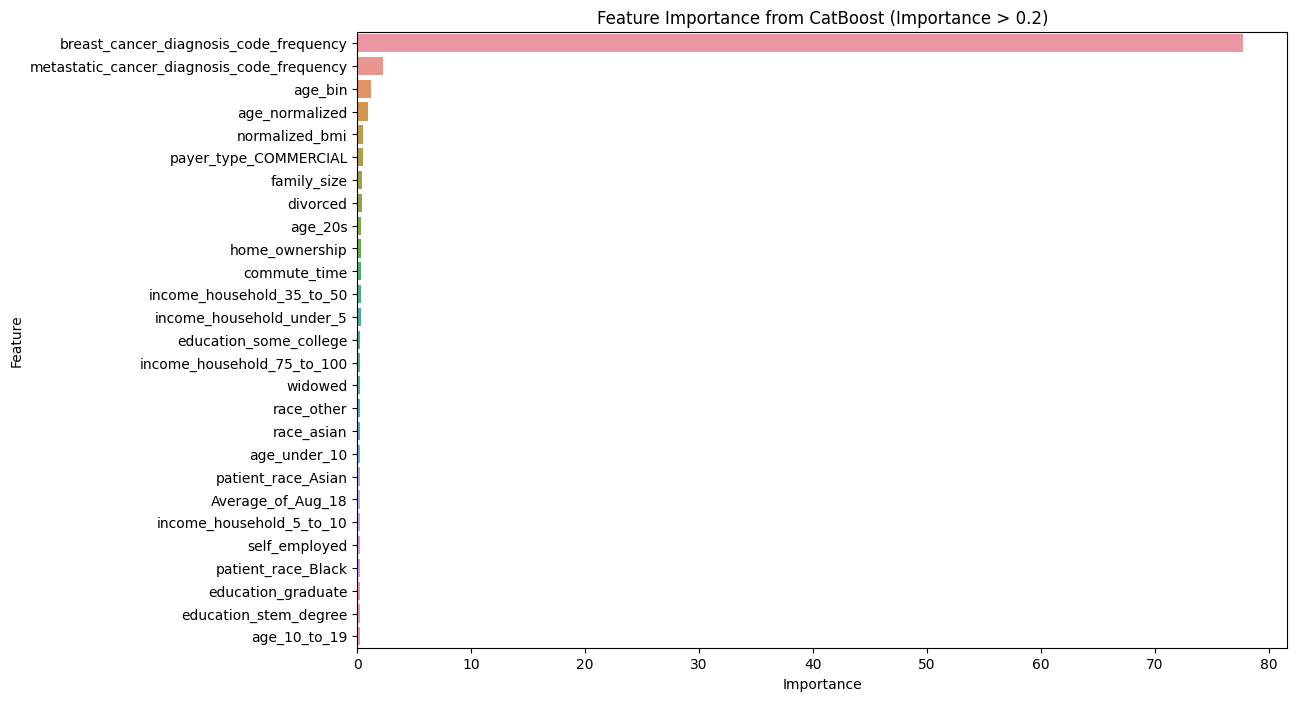

In [52]:
# Fit initial model - CatBoost

#Train the model
ctb_model = CatBoostRegressor(
    random_state=32, 
    verbose=False
)
ctb_model.fit(x_train, y_train, eval_set=(x_test, y_test), use_best_model=True)

#Predict
catboost_y_pred = ctb_model.predict(x_test)

#Calculate RMSE
print('RMSE for initial CatBoost model: ',rmse(y_test, catboost_y_pred)  ) #84.59

# Get feature importance
feature_importances = ctb_model.get_feature_importance(Pool(x_train, label=y_train))
feature_names = x_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importance greater than 0
filtered_importance_df = importance_df[importance_df['Importance'] > 0.2]

# Display the filtered feature importances
print('\n',filtered_importance_df.to_string(index=False))

# Visualize the filtered feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from CatBoost (Importance > 0.2)')
plt.show()

RMSE for initial Random Forest Classifier model:  130.75871143589382

Filtered Feature Importances:
                                    Feature  Importance
    breast_cancer_diagnosis_code_frequency    0.178316
                            age_normalized    0.103854
                                   age_bin    0.103575
metastatic_cancer_diagnosis_code_frequency    0.090584
                            normalized_bmi    0.053113
                     payer_type_COMMERCIAL    0.033345
                       payer_type_MEDICAID    0.024964
             payer_type_MEDICARE ADVANTAGE    0.023132
                        patient_race_White    0.022981
                        patient_race_Black    0.014541
                     patient_race_Hispanic    0.010630
                        patient_race_Other    0.009901
                        patient_race_Asian    0.007582


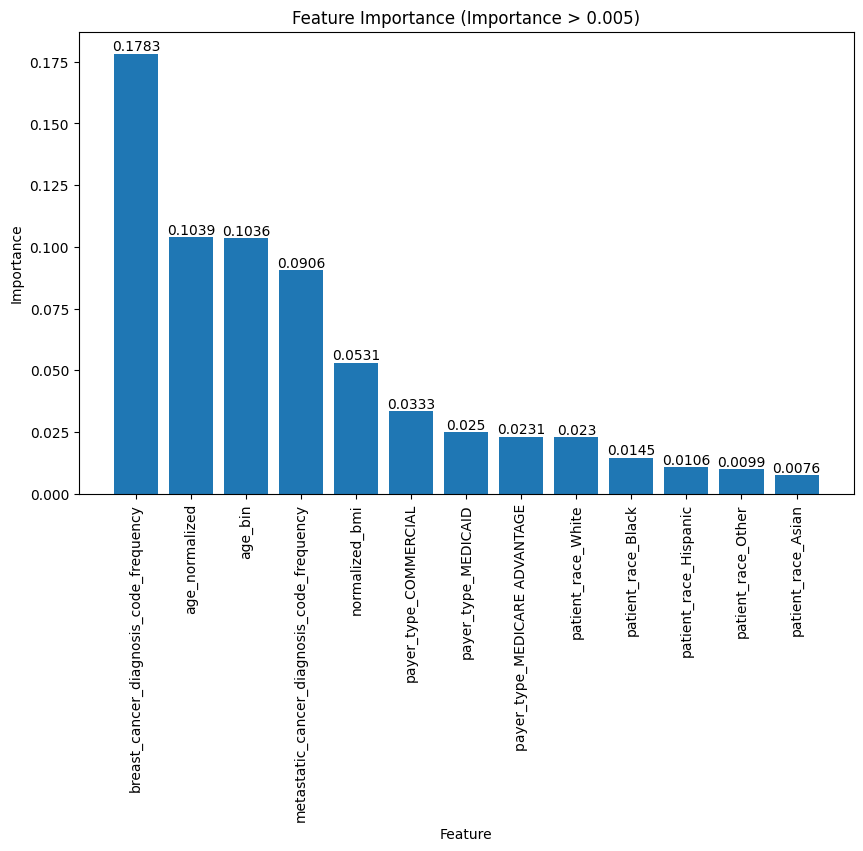

In [53]:
# Fit initial model - Random Forest Classifier

#Train the model
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train)

#Predict
rf_Y_pred = random_forest.predict(x_test)

#Calculate RMSE
print('RMSE for initial Random Forest Classifier model: ',rmse(y_test, rf_Y_pred) ) #130.75

# Get feature importances
feature_importances = random_forest.feature_importances_
feature_names = x_train.columns

# Create a DataFrame to display feature importances
important_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importances above a threshold
threshold = 0.005
important_features = important_features_df[important_features_df['Importance'] > threshold]

# Display the filtered feature importances
print('\nFiltered Feature Importances:\n', important_features.to_string(index=False))

# Visualize filtered feature importances
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(important_features)), important_features['Importance'], tick_label=important_features['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"Feature Importance (Importance > {threshold})")

# Add text labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()

RMSE for Initial RandomForestRegressor model: 94.75482808142402

Selected Features:
                                    Feature  Importance
    breast_cancer_diagnosis_code_frequency    0.464167
metastatic_cancer_diagnosis_code_frequency    0.061258
                            age_normalized    0.037275
                                   age_bin    0.037078
                            normalized_bmi    0.018515
                     payer_type_COMMERCIAL    0.010490
                       payer_type_MEDICAID    0.009997
             payer_type_MEDICARE ADVANTAGE    0.008264
                        patient_race_Black    0.007432
                        patient_race_White    0.006318
                                   veteran    0.006011
                              age_10_to_19    0.005681
                        patient_race_Asian    0.005528
                                  divorced    0.005126


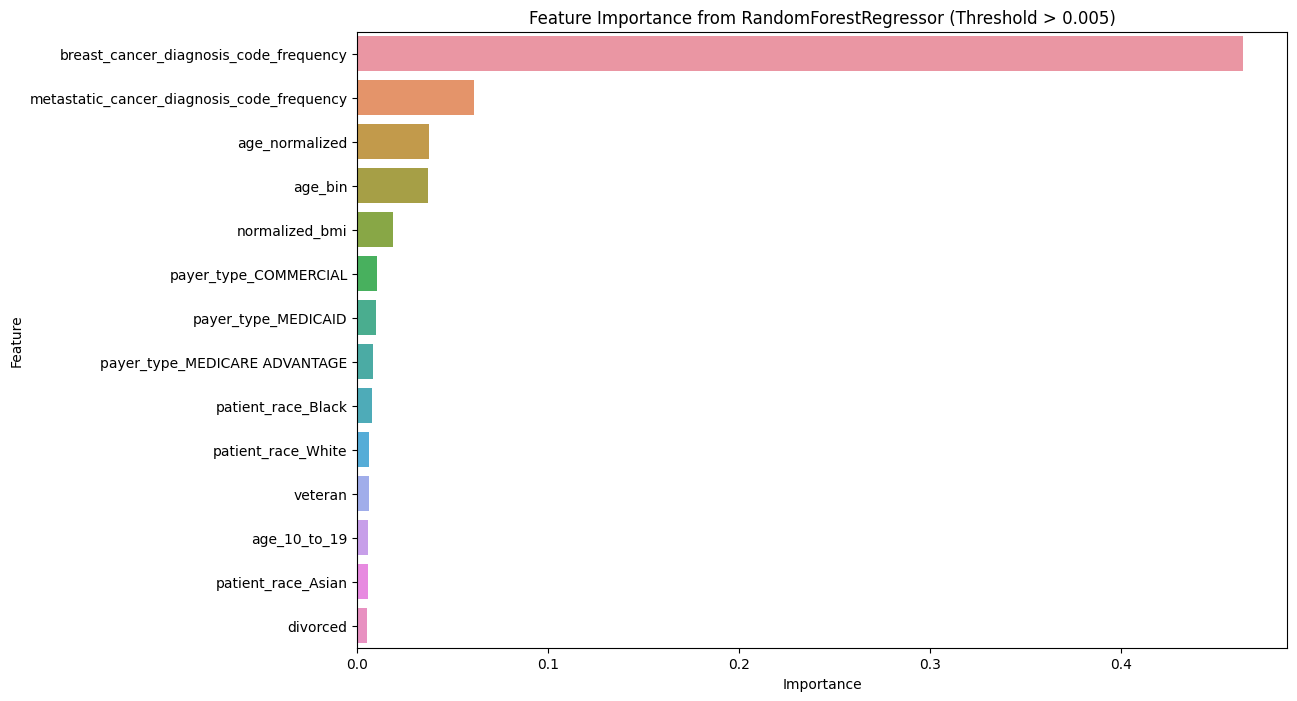

In [54]:
# Fit initial model - Random Forest Regressor

#Train the model
rfr_model = RandomForestRegressor(n_estimators=10, random_state=32, n_jobs=-1)
rfr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rfr_model.predict(x_test)

# Calculate RMSE
print('RMSE for Initial RandomForestRegressor model:', rmse(y_test, y_pred))  # 94.75

# Get feature importances
feature_importances = rfr_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importances_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importances above a threshold
threshold = 0.005
important_features = feature_importances_df[feature_importances_df['Importance'] > threshold]

# Print selected features
print("\nSelected Features:\n", important_features.to_string(index=False))

# Visualize filtered feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances_df[feature_importances_df['Importance'] > threshold],
            x='Importance', y='Feature')
plt.title('Feature Importance from RandomForestRegressor (Threshold > {})'.format(threshold))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


RMSE for Initial Gradient Boosting Model:  91.3341615794013

Selected Features from XGB model:
                                Feature  Importance
                      patient_state_IL    0.039583
breast_cancer_diagnosis_code_frequency    0.038710
                      patient_state_WV    0.013090
                     Average_of_Jan_17    0.011071
                     Average_of_Jan_18    0.010989
                     Average_of_Dec_17    0.010337
                                female    0.009830
                     Average_of_Aug_16    0.009762
                     Average_of_Aug_14    0.009679
                     Average_of_Apr_18    0.009498
                     Average_of_Jun_17    0.009495
                      patient_state_WA    0.009397
                     Average_of_Mar_16    0.009094
           income_household_six_figure    0.008628
                     Average_of_Dec_15    0.008451
                     Average_of_Aug_17    0.008426
                     Average_of_Sep_1

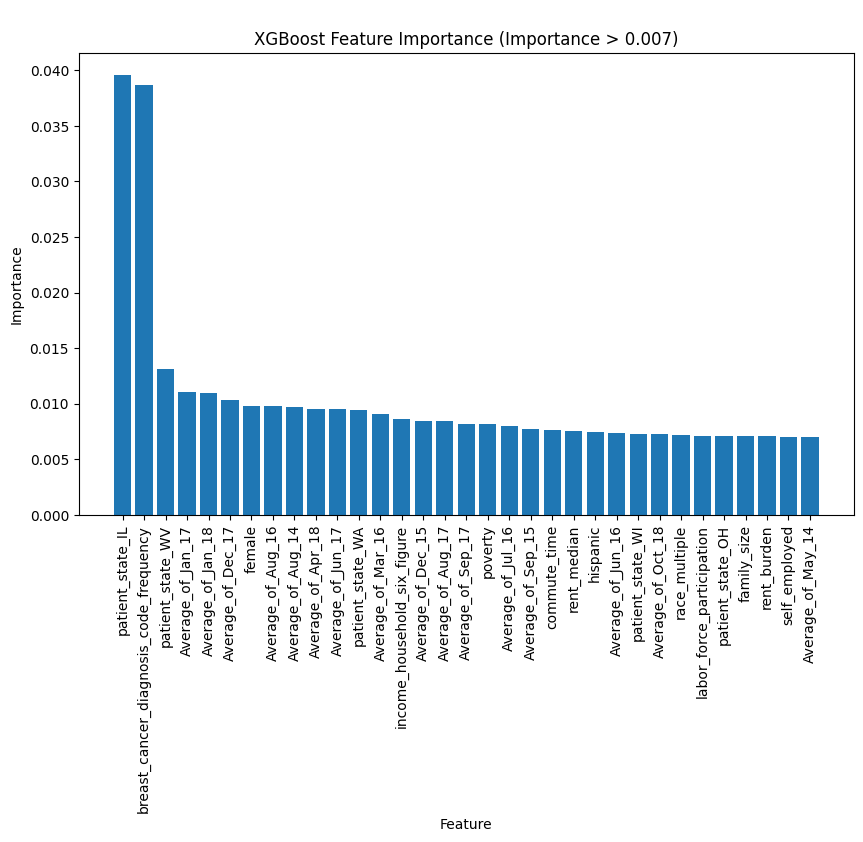

In [55]:
# Fit initial model - Feature Importance from Gradient Boosting Models

# Initialize the model
xgb_model = xgb.XGBRegressor(random_state=32)

# Fit the model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xg = xgb_model.predict(x_test)

# Calculate RMSE
print('RMSE for Initial Gradient Boosting Model: ',rmse(y_test, y_pred_xg) ) #91.33

# Get feature importances
xgb_feature_importances = xgb_model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importances_df_xgb = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter features with importances above a threshold
threshold = 0.007
important_features_xgb = feature_importances_df_xgb[feature_importances_df_xgb['Importance'] > threshold]

# Print selected features
print("\nSelected Features from XGB model:\n", important_features_xgb.to_string(index=False))

# Visualize filtered feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(important_features_xgb)), important_features_xgb['Importance'], tick_label=important_features_xgb['Feature'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title(f"\nXGBoost Feature Importance (Importance > {threshold})")
plt.show()


Selected Features from Mutual Information model:
 ['patient_zip3', 'income_household_35_to_50', 'race_multiple', 'health_uninsured', 'Average_of_Oct_13', 'Average_of_Jun_14', 'Average_of_Nov_14', 'Average_of_Dec_14', 'Average_of_Jan_15', 'Average_of_Feb_15', 'Average_of_Aug_15', 'Average_of_Dec_15', 'Average_of_Jan_16', 'Average_of_Feb_16', 'Average_of_Oct_16', 'Average_of_Mar_17', 'Average_of_Sep_17', 'breast_cancer_diagnosis_code_frequency', 'metastatic_cancer_diagnosis_code_frequency', 'Region_Midwest']


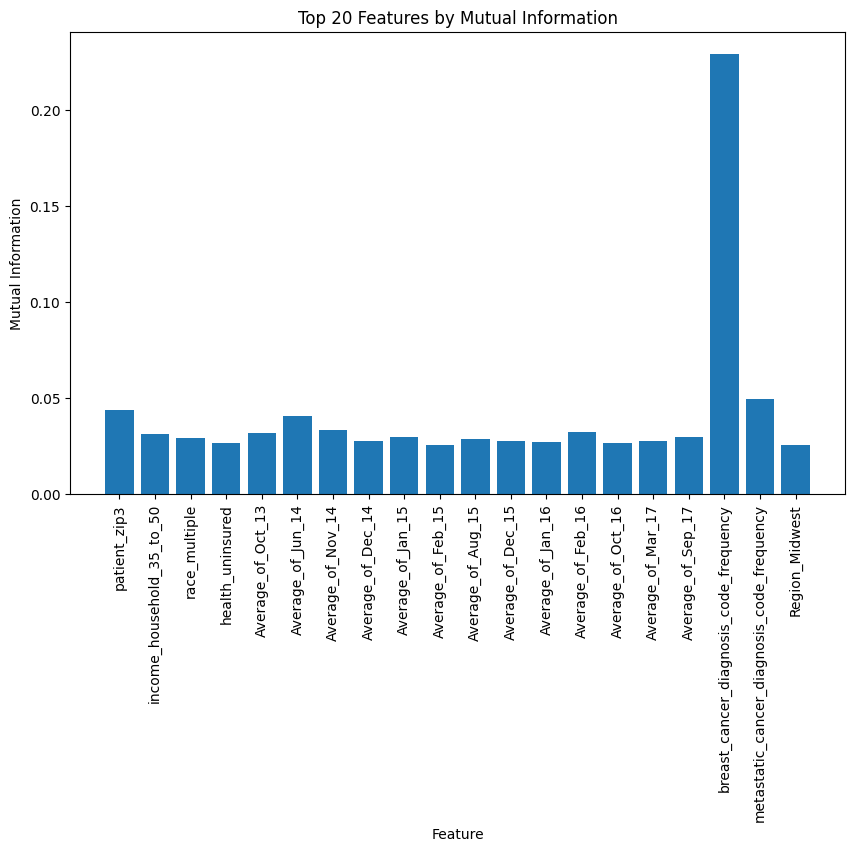

In [56]:
# Feature Importance from Mutual Information

# Calculate mutual information
mi = mutual_info_regression(x_train, y_train)

# Select top k features
k = 20  # Adjust k to the desired number of features
selector = SelectKBest(score_func=mutual_info_regression, k=k)
selector.fit(x_train, y_train)

# Get selected features
selected_features = x_train.columns[selector.get_support()]

# Print selected features
print("\nSelected Features from Mutual Information model:\n", selected_features.tolist())

# Visualize selected features
plt.figure(figsize=(10, 6))
plt.bar(range(k), selector.scores_[selector.get_support()], tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title(f"Top {k} Features by Mutual Information")
plt.show()


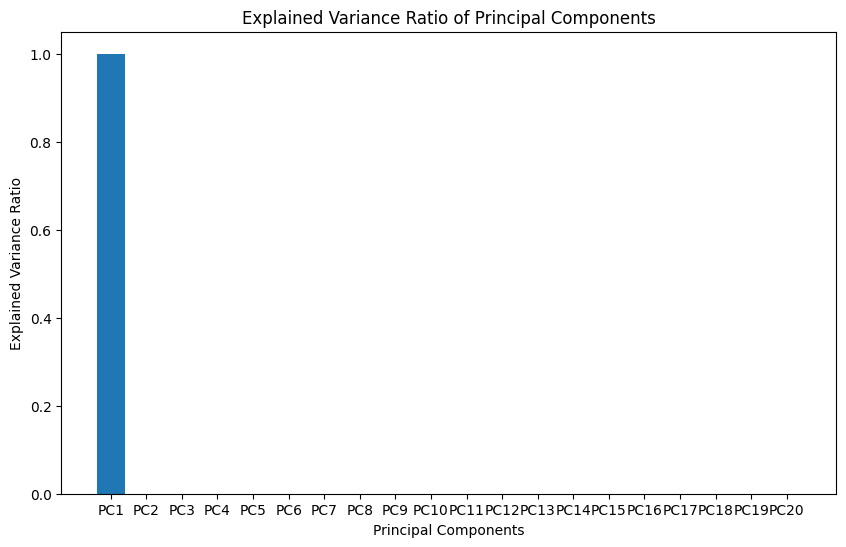

Important Features and Their Importance Rates:
                      Feature  Importance Rate (%)
                 patient_zip3                  5.0
                      density                  5.0
                 age_10_to_19                  5.0
                      age_40s                  5.0
     income_household_5_to_10                  5.0
    income_household_10_to_15                  5.0
                   home_value                  5.0
                       farmer                  5.0
                   race_black                  5.0
                   race_asian                  5.0
                      poverty                  5.0
                 commute_time                  5.0
                      age_bin                 10.0
      income_category_encoded                 25.0
           patient_race_Black                 30.0
        patient_race_Hispanic                 20.0
           patient_race_Other                 15.0
           patient_race_White      

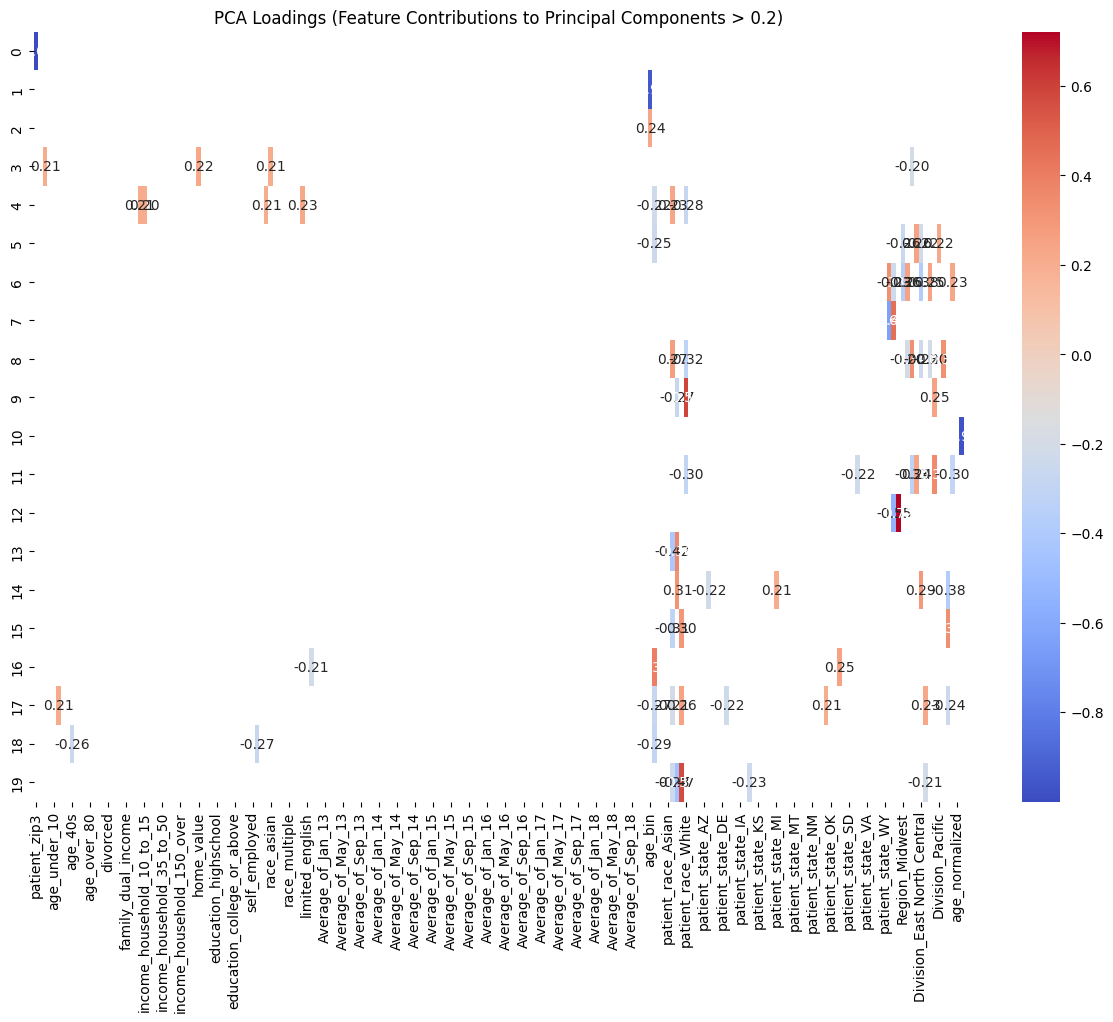

In [57]:
# Initialize PCA
pca = PCA(n_components=20)  # Adjust the number of components

# Fit and transform the data
x_train_pca = pca.fit_transform(x_train)

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), pca.explained_variance_ratio_, tick_label=[f'PC{i}' for i in range(1, 21)])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Get the loadings (components)
loadings = pca.components_

# Create a DataFrame to hold loadings and feature names
loadings_df = pd.DataFrame(loadings, columns=x_train.columns)

# Set the threshold
threshold = 0.2

# Create a mask for loadings greater than the threshold
mask = loadings_df.abs() < threshold
filtered_loadings_df = loadings_df.mask(mask)

# Display important features and their rates of importance
important_features = filtered_loadings_df.columns.tolist()
importance_rates = (1 - filtered_loadings_df.isnull().mean()) * 100  # Calculate non-null rates in percentage
important_features_df = pd.DataFrame({'Feature': important_features, 'Importance Rate (%)': importance_rates})

# Display only features with non-zero importance rates
important_features_df = important_features_df[important_features_df['Importance Rate (%)'] > 0]

print("Important Features and Their Importance Rates:")
print(important_features_df.to_string(index=False))

# Plot the heatmap of the filtered loadings
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_loadings_df, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, mask=mask)
plt.title('PCA Loadings (Feature Contributions to Principal Components > 0.2)')
plt.show()

**After thoroughly reviewing the aforementioned outcomes and incorporating domain expertise to discern factors that could influence the duration until the initial treatment, the subsequent features have been meticulously chosen. These selected features are poised to enrich the model training process and enhance its predictive capability.**

**The dataset is once again split into train and test from the train_dataset only for the selected important features.**

In [58]:
# Selecting important features from the original dataset

# important_features = ['breast_cancer_diagnosis_code_frequency','metastatic_cancer_diagnosis_code_frequency', 'age_normalized',
#  'patient_zip3', 'payer_type_COMMERCIAL', 'payer_type_MEDICAID','payer_type_MEDICARE ADVANTAGE', 'patient_race_Black', 'patient_race_White',
#  'veteran', 'patient_race_Asian', 'patient_race_Other', 'patient_race_Hispanic','divorced', 
# 'commute_time', 'poverty', 'female', 'income_category_encoded', 'widowed', 'self_employed', 
# 'education_graduate', 'family_size', 'Average of Sep-17', 'Average of Jan-17']

# important_features = ['breast_cancer_diagnosis_code_frequency','metastatic_cancer_diagnosis_code_frequency',
#                       'age_normalized', 'patient_zip3', 'payer_type_COMMERCIAL', 'payer_type_MEDICAID',
#                       'payer_type_MEDICARE ADVANTAGE', 'patient_race_Black', 'patient_race_White',
#                     'veteran', 'patient_race_Asian', 'patient_race_Other', 'patient_race_Hispanic',
#                     'commute_time', 'poverty', 'income_category_encoded', 'widowed', 'self_employed',
#                       'education_graduate', 'health_uninsured', 'normalized_bmi', 'unemployment_rate'                  
# ]

important_features = ['breast_cancer_diagnosis_code_frequency','metastatic_cancer_diagnosis_code_frequency',
                      'age_bin', 'patient_zip3', 'payer_type_COMMERCIAL', 'payer_type_MEDICAID',
                      'payer_type_MEDICARE ADVANTAGE','patient_race_Black', 'patient_race_White',
                    'veteran', 'patient_race_Asian', 'patient_race_Other', 'patient_race_Hispanic',
                    'poverty', 'income_category_encoded', 
                      'education_graduate', 'health_uninsured','unemployment_rate'                  
]

 
# Create a new DataFrame with only the important features
X = train_dataset[important_features]

# Define Target Variable
y = train_dataset['metastatic_diagnosis_period']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33,random_state=32,shuffle=True)

# Verify columns in x_train and y_train
print("Shape of X_train:", X_train.shape) #(8825, 18)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape) #(4348, 18)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8825, 18)
Shape of y_train: (8825,)
Shape of X_test: (4348, 18)
Shape of y_test: (4348,)


## 4. Model Training

The selected models are trained on the newly split data, comprising X_test and X_train. Upon analyzing the results of the model training, hyperparameters can be fine-tuned and optimized to enhance performance.

In [59]:
# Model Training - CatBoost

#Train the model
ctb_model = CatBoostRegressor(
    random_state=32, 
    verbose=False, iterations=255, learning_rate=0.1, depth=3    
)
ctb_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

#Predict
catboost_y_pred = ctb_model.predict(X_test)

#Calculate RMSE
print('RMSE for model CatBoost: ',rmse(y_test, catboost_y_pred)  ) #83.59


RMSE for model CatBoost:  83.59785697255685


In [60]:
# Model Training - Random Forest Classifier

#Train the model
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

#Predict
rf_Y_pred = random_forest.predict(X_test)

#Calculate RMSE
print('RMSE for model Random Forest Classifier: ',rmse(y_test, rf_Y_pred) ) #120.52

RMSE for model Random Forest Classifier:  120.52360562321185


In [61]:
# Model Training - Random Forest Regressor

#Train the model
model = RandomForestRegressor(random_state=32, n_jobs=-1, max_depth=7)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
print('RMSE for RandomForestRegressor: ',rmse(y_test, y_pred) ) # 83.66

RMSE for RandomForestRegressor:  83.66779918041598


In [62]:
#Model Training - XgBoost - Gradient Boosting

xgb_model = XGBRegressor(n_estimators = 60, learning_rate=0.1, max_depth=5, random_state=32)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

xgb_predictions = xgb_model.predict(X_test)
print("RMSE for model Gradient Boosting (XGB): ", rmse(y_test, xgb_predictions)) #83.89


RMSE for model Gradient Boosting (XGB):  83.89529000667324


In [63]:
#Model Training - LightGBM

lgbm_model = LGBMRegressor(random_state=32, learning_rate=0.01, n_estimators=300)
lgbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

lgbm_predictions = lgbm_model.predict(X_test)
print("RMSE for model LightGBM :", rmse(y_test, lgbm_predictions)) #84.03


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1579
[LightGBM] [Info] Number of data points in the train set: 8825, number of used features: 18
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 95.982663
RMSE for model LightGBM : 84.03483459372323


In [64]:
#Model Training - Gradient Boosting Regressor

gbr_model = GradientBoostingRegressor(random_state=32, learning_rate=0.12, n_estimators=230, max_depth=2)
gbr_model.fit(X_train, y_train)

gbr_predictions = gbr_model.predict(X_test)
print("RMSE for model Gradient Boosting Regressor:", rmse(y_test, gbr_predictions)) #83.60


RMSE for model Gradient Boosting Regressor: 83.60868787542383


In [65]:
#Model Training -  SVR (Support Vector Regressor)

#Train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_predictions = svr_model.predict(X_test)

# Calculate RMSE
print("RMSE for model SVR :", rmse(y_test, svr_predictions)) #122.05


RMSE for model SVR : 122.06282032940923


In [66]:
#Model Training - Neural Network Regressor (MLPRegressor)

#Train the model
mlp_model = MLPRegressor(random_state=32, max_iter=180, hidden_layer_sizes=(80,), early_stopping=True)

mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test)

# Calculate RMSE
print("RMSE for model MLP Regressor:", rmse(y_test, mlp_predictions)) #108.95


RMSE for model MLP Regressor: 108.95437578820787


In [67]:
# Model Training - HistGradientBoostingRegressor

# Create the model
hist_model = HistGradientBoostingRegressor(max_iter=110, learning_rate=0.1, max_depth=3, random_state=32)

# Train the model
hist_model.fit(X_train, y_train)

# Make predictions on the test set
hist_model_predictions = hist_model.predict(X_test)

# Calculate RMSE
print('RMSE for model hist_model:', rmse(y_test, hist_model_predictions)) # 83.73


RMSE for model hist_model: 83.73140884646722


In [68]:
from sklearn.linear_model import Ridge

# Model Training - Ridge Regression
ridge_model = Ridge(random_state=32)  
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)
print("RMSE for model Ridge Regression:", rmse(y_test, ridge_predictions)) #108.43


RMSE for model Ridge Regression: 108.3149510517054


In [69]:
from sklearn.ensemble import AdaBoostRegressor

# Model Training - AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=32, n_estimators=110, learning_rate=0.001)
adaboost_model.fit(X_train, y_train)

adaboost_predictions = adaboost_model.predict(X_test)
print("RMSE for model AdaBoost Regressor:", rmse(y_test, adaboost_predictions)) #86.39


RMSE for model AdaBoost Regressor: 86.39954813258606


## 5. Model Evaluation

In [70]:

# Create a list of model names
model_names = ['Cat Boost','Random Forest Classifier', 'Random Forest Regressor', 'XGBoost - Gradient Boosting', 'LightGBM', 'Gradient Boosting Regressor', 'SVR (Support Vector Regressor)', 'Neural Network Regressor (MLPRegressor)', 'HistGradientBoostingRegressor', 'Ridge Regression', 'AdaBoost Regressor']

# Initialize empty lists to store evaluation metric values
rmse_values = []
mae_values = []
r2_values = []

# List of predictions from different models
predictions = [catboost_y_pred, rf_Y_pred, y_pred, xgb_predictions, lgbm_predictions, gbr_predictions, svr_predictions, mlp_predictions, hist_model_predictions, ridge_predictions, adaboost_predictions]

# True values
y_true = y_test

# Calculate and store metrics for each model
for model_name, y_pred in zip(model_names, predictions):
    rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    rmse_values.append(rmse_val)
    mae_values.append(mae)
    r2_values.append(r2)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MAE': mae_values,
    'R²': r2_values
})

# Display the DataFrame with metrics
print(metrics_df)

                                      Model        RMSE        MAE        R²
0                                 Cat Boost   83.597857  64.644749  0.418469
1                  Random Forest Classifier  120.523606  80.118445 -0.208723
2                   Random Forest Regressor   83.667799  64.099766  0.417495
3               XGBoost - Gradient Boosting   83.895290  64.847286  0.414324
4                                  LightGBM   84.034835  65.266360  0.412374
5               Gradient Boosting Regressor   83.608688  64.413467  0.418318
6            SVR (Support Vector Regressor)  122.062820  86.045362 -0.239794
7   Neural Network Regressor (MLPRegressor)  108.954376  92.515987  0.012193
8             HistGradientBoostingRegressor   83.731409  64.681412  0.416609
9                          Ridge Regression  108.314951  92.302090  0.023754
10                       AdaBoost Regressor   86.399548  67.304325  0.378837


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.model_selection import KFold

# Define the list of models
models = [
    CatBoostRegressor(random_state=32, verbose=False, iterations=200, learning_rate=0.1, depth=3,
                      eval_metric='RMSE'),
    RandomForestRegressor(random_state=32, n_jobs=-1, max_depth=7),
    XGBRegressor(n_estimators=60, learning_rate=0.1, max_depth=5, random_state=32),
    LGBMRegressor(random_state=32),
    GradientBoostingRegressor(random_state=32),
    SVR(),
    MLPRegressor(random_state=32, max_iter=60),
    HistGradientBoostingRegressor(max_iter=40, learning_rate=0.1, max_depth=5, random_state=42),
    Ridge(alpha=1.0, random_state=32)  ,
    AdaBoostRegressor(random_state=32)
]


# Define the number of folds
num_folds = 10
kf = KFold(n_splits=num_folds)

# Perform cross-validation for each model
for model in models:
    fold_idx = 1
    fold_rmse_scores = []
    
    # Perform cross-validation
    for train_index, val_index in kf.split(X_train):
      
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        model.fit(X_train_fold, y_train_fold)
        
        # Make predictions on the validation set
        predictions = model.predict(X_val_fold)
        
        # Calculate RMSE for the fold
        fold_rmse = np.sqrt(mean_squared_error(y_val_fold, predictions))
        fold_rmse_scores.append(fold_rmse)
        
        # Print RMSE for the fold
        print(f"Model: {type(model).__name__}, Fold: {fold_idx}, RMSE: {fold_rmse}")
        
        fold_idx += 1
    
    # Calculate and print mean RMSE across all folds
    mean_rmse = np.mean(fold_rmse_scores)
    print(f"Model: {type(model).__name__}, Mean RMSE across {num_folds} folds:", mean_rmse)
    print()


Model: CatBoostRegressor, Fold: 1, RMSE: 83.96284340276404
Model: CatBoostRegressor, Fold: 2, RMSE: 83.58589841606359
Model: CatBoostRegressor, Fold: 3, RMSE: 86.70632905014156
Model: CatBoostRegressor, Fold: 4, RMSE: 82.07778239535236
Model: CatBoostRegressor, Fold: 5, RMSE: 79.60083290584718
Model: CatBoostRegressor, Fold: 6, RMSE: 83.6930515511623
Model: CatBoostRegressor, Fold: 7, RMSE: 82.95842179212833
Model: CatBoostRegressor, Fold: 8, RMSE: 82.86121026205048
Model: CatBoostRegressor, Fold: 9, RMSE: 85.9568801407348
Model: CatBoostRegressor, Fold: 10, RMSE: 85.69618366660428
Model: CatBoostRegressor, Mean RMSE across 10 folds: 83.7099433582849

Model: RandomForestRegressor, Fold: 1, RMSE: 83.78652027780274
Model: RandomForestRegressor, Fold: 2, RMSE: 83.77559067028318
Model: RandomForestRegressor, Fold: 3, RMSE: 87.95474680641236
Model: RandomForestRegressor, Fold: 4, RMSE: 81.69045805789769
Model: RandomForestRegressor, Fold: 5, RMSE: 80.00883013299057
Model: RandomForestRegres

## 6. Model Optimization

This step will focus on further improving the model by implementing the stacked ensemble. This will stack the best performing models together along with a base model to achieve a better and robust output.

Finally, using the weights of this regressor, the output will be generated for the test_dataset.

### 6.1 Model Ensemble

In [72]:
# Initialize the top 5 base models
model1 = CatBoostRegressor(verbose=False, iterations=220, learning_rate=0.01, depth=3)
model2 = RandomForestRegressor(n_jobs=-1, max_depth=7)
model3 = XGBRegressor(n_estimators=60, learning_rate=0.01, max_depth=3)
model4 = GradientBoostingRegressor()


from sklearn.linear_model import LinearRegression
# Initialize the meta-model
meta_model = LinearRegression(n_jobs = 120, positive = True)

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('catboost', model1),
        ('random_forest', model2),
        ('xgboost', model3),
        ('gradient_boosting', model4)
    ],
    final_estimator=meta_model,
    n_jobs=-1
)

# Fit the stacking model
stacking_regressor.fit(X_train, y_train)

# Make predictions
stacking_predictions = stacking_regressor.predict(X_test)

# Evaluate the model
stacked_rmse_val = rmse(y_test, stacking_predictions)
mae = mean_absolute_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print("Stacking Regressor RMSE:", stacked_rmse_val) 
print("Stacking Regressor MAE:", mae) 
print("Stacking Regressor R²:", r2) 


Stacking Regressor RMSE: 83.49558095981784
Stacking Regressor MAE: 64.04915555470559
Stacking Regressor R²: 0.41989097863862224


### 6.2 Prediction

In [73]:
# 'selected_features' contains the list of selected features
final_test_subset = test_dataset[important_features]

In [74]:
# Make predictions on the test dataset
test_predictions = stacking_regressor.predict(final_test_subset)

# Create a DataFrame with patient_id and predicted metastatic_diagnosis_period
predictions_df = pd.DataFrame({
    'patient_id': raw_data_test['patient_id'],
    'metastatic_diagnosis_period': test_predictions
})

# Convert the 'metastatic_diagnosis_period' column to integer datatype
predictions_df['metastatic_diagnosis_period'] = predictions_df['metastatic_diagnosis_period'].astype(int)

# Save the DataFrame as a CSV file
predictions_df.to_csv('submission.csv', index=False)
print('File Created!')


File Created!


## 7 Conclusion

The submission file includes the predicted results, which denote the estimated number of days it will take to diagnose cancer. Through our analysis and model development process, several insights and opportunities for future improvements have emerged.

**Key Findings:**
- Temperature-related columns showed limited impact on the target variable, suggesting that they may not be significant predictors in the current modeling approach.
- Our models, although performing reasonably well, may benefit from further refinement and feature engineering to enhance predictive accuracy.

**Future Objectives:**
1. **Feature Engineering:** Explore alternative methods of extracting information from temperature-related columns. For example,  deriving features that capture the type of weather prevalent in the patient's location, such as humidity levels, average temperature, or climatic patterns.
   
2. **Weather-based Features:** Introduce new features that characterize the climate conditions of the patient's residence, including whether the location experiences predominantly cold, hot, humid, or dry weather. Such features could provide valuable insights into how environmental factors influence cancer diagnosis timelines.

3. **Geographical Analysis:** Conduct a more in-depth analysis of geographical factors and their impact on diagnosis periods. This could involve incorporating additional geographic data, such as altitude, proximity to urban areas, or regional healthcare infrastructure, to better understand regional variations in diagnosis times.

4. **Model Refinement:** Continuously refine and optimize the predictive models by fine-tuning hyperparameters, experimenting with different algorithms, and exploring ensemble techniques to leverage the strengths of multiple models.

By pursuing these future objectives, we aim to enhance the predictive capabilities of our models and gain deeper insights into the factors influencing cancer diagnosis timelines, ultimately contributing to improved patient outcomes and healthcare decision-making.